# Introduction to the Quant Fund and this document

The quant divison/sector is part of the Cambridge Student Investment Fund (CamSIF). The quant secotr has 3 main responsibilites; Quantitative Trading, Quantitative Research and then API & Data Managment. We primarily operate using Python (only a few of the fund members are familiar with C++, we aim to grow this futher into the future). Whilst certain softwares exsit to help develop and test algorithms, they don't allow us to code the back-end script to produce the algorithm. Whilst this can reduce the time it takes for us to build and test a strategy, a key objective of joining this quantitive sector within the CamSIF is to develop your programming skills, allowing you to think logically and creatively to design an algorithm exactly to your specification.

This document will provide an insight to: key things to consider, **data extraction**, **defining important variables** , **how to programme a buy and sell signal** , **Train-Validation-Test split, cross fold validation and optimising of parameters**, **backtesting methodolgy** , **storing results**. Beyond this point, testing your own ideas will help your learning significantly. Finally, at the end of the document I have added 2 test cases where look ahead bias is purposefully programmed in, and if you can identify it and remove it, I will provide my solutions and updated scripts. Remember there are multiple methods to solve a problem.

Images have had issues with rendering when converting this Notebook to pdf via Latex. Therefore images can be found in the Appendicies, the figures in the appendicies will be clearly labelled in the text.

This document is avaliable for people within the CamSIF, but primarily designed for members of the quant division/sector. 

Certain coding scripts and figures have been sourced from outside CamSIF. Example scripts have been added for educational purposes. 

# Key Considerations

Please note I may have missed some points here, I will continue to add to this document and release the updated versions. 

Firstly, we are building strategies which trade equities. We have access to Time-Series data (also known as aggregate data and/or candles). The alternative form of price data is referred to as 'ticker' ([What is a Stock Ticker](https://www.investopedia.com/ask/answers/12/what-is-a-stock-ticker.asp)), meaning, whenever the price moves we are updated of this movement.

In contrast, with time-series, we may use candles ([Heikin-Ashi Candlesticks](https://www.investopedia.com/trading/heikin-ashi-better-candlestick/)). A dataset with 30 minute candles means we recieve the following prices for the each 30 minute time period:
1. Open price: the price at the start of that period
2. High price: the highest price during that period
3. Low price: the lowest price during that period
4. Close price: the final price of that period
5. Volume : the amount buy/sell trades executed during that period.
6. Adjusted Close: the close price adjusted for corporate actions. ([What is adjusted close?](https://www.investopedia.com/terms/a/adjusted_closing_price.asp))

This is the data we will have to build our strategies, starting as a low [capital](https://www.investopedia.com/terms/c/capital.asp) fund, we have to operate like this. Additional sources of data which can benefit our trades, including the [Order Book](https://www.investopedia.com/terms/o/order-book.asp) information. This is much higher frequency algorithms, currently we can not trade this information, since it will require a subscription purchase to vendors who provide this information stream.

As a student lead investment fund, *we are limited to what we can trade* due to rules and regulations. For example, we **cannot** trade derivatives, e.g. we are not involved in derivative pricing theory, however, if you find you have produced research into derivatives pricing and trading please share with the team as this is very interesting, and could fuel other areas of research!

Secondly, the considerations of making an algorithm include:
- **The time period** - how often is the data sampled in the time series data you are requesting. Currently single day period - time series data is appropriate, intra day ($<$1 day) is also worth considering.
- **Data extraction** - The python package [`yfinance`](https://pypi.org/project/yfinance/) is a suitable option for now (which pulls data from [Yahoo Finance](https://uk.finance.yahoo.com/)), however with regards to this data, it has concerns on it's accuracy. The reasons for this are listed below. As their API provider is free then we are currently taking advantage of that. Additionally, they provide access to numerous companies market data, globally. Now other company financials are avaliable from the API - `finnhub`, they offer certain financial information for free, they other historical news where sentiment analysis can be preformed. 
    1. The data is aggregated (combined and put into one). This is not ideal for training models since we do not have an in-depth view of what is happening. For example, think of how useful it is to know which hospitals have how many patients with COVID vs. just knowing a country has $X$ amount of covid patients.
    2. As mentioned before, the data is delayed by 15 minutes. [Why is data delayed by 15 minutes](https://www.investopedia.com/terms/r/real_time.asp)
- **Understanding the data** - Once you have completed the step of data extraction, understanding this data is key. The data will be extracted so row 0 represents the furthest point in historical time for the date range which you have extracted for. The row at the bottom of the DataFrame will be the nearest point in time (futherest point nearer the future). This is how the data will be feed into algorithms, starting from the furthest point in historical time, up to the nearest point in time (with respect to your extracted date range).
- **Type of algorithm** - the type of algorithm you develop will influence how you pre-process your data. If you are running a more 'simpler' algorithm, such as a moving average cross over, there is no need to normalise/scale your data. Whereas for a Neural Network, scaling down data is often required. ([Why?](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/))

Thirdly, please consider the environment in which you would like to programme your python scripts. I recommend personally downloading Anaconda Navigator, recommended IDEs include Spyder (producing .py files, good for production level) which is very suitable for newcomers, and when trying to build complex codes, reason: Easy to use, all your variables are defined within the variable explorer (top right tab) which clearly highlights the size of your variables, their values, their datatype, all which are crucial for debugging sripts. Other environments include Jupyter Notebook and VSCode (which Sai recommends ;)), these IDEs allow you to format your work very clearly, and allow for markdown text, so you can add regular text as well as mathematical formulas and Python script (this document is a Notebook, and has been produced in Jupyter Notebook/VS). Some links to setting those up are listed below. If they do not help, please do reach out!
- Spyder: https://docs.spyder-ide.org/current/installation.html
- VSCode + Jupyter Notebook: https://code.visualstudio.com/docs/datascience/jupyter-notebooks

Additionally, prior to beginning to code, you must have the appropriate libaries installed. If you run a code from our GitHub it may inform you if you are missing the appropriate libaries (if it does not, you already have the libaries installed), if you do encounter an error please view the output from you terminal on which libary to 'pip install'. The currently required libraries are:
```bash
pip install yfinance
pip install numpy
pip install pandas
pip install matplotlib
pip install scikit-learn
```
Finally, when designing an algorithm which recognises patterns based on the Closing value of a trading day, you can not make a market order at the Close, due to the fact that by the time it takes to recieve the information from our API data provider and run the data through your algorithm (latency) the market will have closed. As a result you will have to place your market order when the market opens the following day. This will likely result in a small price difference (slippage) and can turn a significant return (very high sharpe ratio) algorithm into an algorithm which loses significant funds. Additionally, how our testing works by assuming: ultra low latency and zero slippage, which is highly unlikely to be the case in live trading. 

Example of installing a package on a Jupyter Notebook.

In [1]:
!pip install yfinance


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


---

### Quick Imports
These are the main imports you will do, so doing them at the start of a notebook might simplify your life.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Additionally, some good practices for making your notebook look nice are shown below.

- [Magic Functions](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained)
- [Rich output with matplotlib](https://ipython.readthedocs.io/en/stable/interactive/plotting.html)

In [3]:
# Make as inline rich output
%matplotlib inline


# Set figure params
plt.rcParams["figure.figsize"] = (10,7)

# Data extraction

When extracting data from an API provider, please be aware you may extract out-of-hour market data ([Market Trading hours](https://www.investopedia.com/ask/answers/040115/when-do-stock-market-exchanges-close.asp), [Trading Session](https://www.investopedia.com/terms/t/tradingsession.asp), [How After Hours affect stock pricing](https://www.investopedia.com/ask/answers/05/saleafterhours.asp)).

We can not trade out of hours, and this may confuse your algorithm upon training. Hence, if extracting for an equity listed on the NYSE, their trading hours are 2:30pm-9pm (BST) (9.30am-4.00pm EDT/EST), any rows of data with an index outside this time range should be ignored (Alpaca API usually works with EDT/EST, but certainly check you imported data's date-time index). A key example of how this may distort your algorithm is, if you run a univariate linear regression algorithm (OLS), using 5 observations, and these 5 observaions are being taken from the out of hours data where the market may not have moved (e.g. 00:00 - £200, 01:00 - £200, 02:00 - £200, 03:00 - £200, 04:00 - £200) you will run into an error with the code breaking as a result of a division by 0. As mentioned above, we can not trade out of hours, so incorportating this information is not required and may negatively impact the training of your algorithms. (Prior to removing out of hours data, please familiarise yourself with the date-time index of your extracted data).

Firstly, **Importing Libaries**

In [4]:
import yfinance as yf
import pandas as pd

Now, key labels must be defined when using data extraction. You need a ticker (aka symbol which represents an equity: AAPL = Apple). You need to clarify a start date, and an end date. This will extract daily candles, giving you the Opening value, High value, Low value and Closing value and Volume for that specific day (aka candle). Otherwise you can specify the time-series periods you would like, e.g. 30min. If you extract anything with a period of less than a single day, you are limited to how much historical data you can extract.

Firstly, I will demonstrate daily aggregate data extraction using yfinance.

One thing to note, on notebooks ([Jupyter Notebooks](https://jupyter.org/)), whatever the final line executed returns, it is printed as the console output. For further printing you need to functions such as `print` as seen below.

In [5]:
ticker = 'AAPL'
start = '2019-11-22'
end = '2023-05-20'
df = yf.download(ticker, start, end)
print(f"The dataframe columns are: {df.columns}")

print(df) # See this is not printed nicely

df  # This is the final line.
    # Notebooks have a special case where they
    # automatically handle Dataframe objects and
    # how to make them look nicer (which yf.download returns).

[*********************100%***********************]  1 of 1 completed
The dataframe columns are: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2019-11-22   65.647499   65.794998   65.209999   65.445000   63.928837  \
2019-11-25   65.677498   66.610001   65.629997   66.592499   65.049751   
2019-11-26   66.735001   66.790001   65.625000   66.072502   64.541801   
2019-11-27   66.394997   66.995003   66.327499   66.959999   65.408730   
2019-11-29   66.650002   67.000000   66.474998   66.812500   65.264641   
...                ...         ...         ...         ...         ...   
2023-05-15  173.160004  173.210007  171.470001  172.070007  172.070007   
2023-05-16  171.990005  173.139999  171.800003  172.070007  172.070007   
2023-05-17  171.710007  172.929993  170.419998  172.690002  172.690002   
2023-05-18 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-22,65.647499,65.794998,65.209999,65.445000,63.928837,65325200
2019-11-25,65.677498,66.610001,65.629997,66.592499,65.049751,84020400
2019-11-26,66.735001,66.790001,65.625000,66.072502,64.541801,105207600
2019-11-27,66.394997,66.995003,66.327499,66.959999,65.408730,65235600
2019-11-29,66.650002,67.000000,66.474998,66.812500,65.264641,46617600
...,...,...,...,...,...,...
2023-05-15,173.160004,173.210007,171.470001,172.070007,172.070007,37266700
2023-05-16,171.990005,173.139999,171.800003,172.070007,172.070007,42110300
2023-05-17,171.710007,172.929993,170.419998,172.690002,172.690002,57951600


Secondly, I will demonstrate extraction which is not daily time series (purposefully incorrect to demonstrate that any time period of less than a day will result in the following error: Limited historical data extraction).

The error below can be seen `1 Failed Download`
''''''

In [6]:
ticker = 'AAPL'
start = '2022-11-22'
end = '2023-05-20'

df = yf.download(ticker, start, end, interval='30m')

print(f"\n\nThe size of this data: {df.size}")
df      # From here on out,
        # I won't print the dataframe object unless I need to,
        # since it gets nicely printed anyway by Jupyter Notebooks

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAPL: 15m data not available for startTime=1669093200 and endTime=1684555200. The requested range must be within the last 60 days.


The size of this data: 0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


Next I have repeated the above code, with the range in the last 60 days.

In [7]:
ticker = 'AAPL'
start = '2023-07-01'
end = '2023-07-30'

df = yf.download(ticker, start, end, interval='30m')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-07-03 09:30:00,193.779999,193.880005,192.800003,192.940002,192.940002,8993257
2023-07-03 10:00:00,192.929993,193.149994,192.804993,192.914993,192.914993,3737233
2023-07-03 10:30:00,192.914993,192.929993,191.759995,191.979004,191.979004,5069076
2023-07-03 11:00:00,191.975006,192.449997,191.910004,192.354996,192.354996,3197932
2023-07-03 11:30:00,192.360001,192.500000,192.160095,192.229996,192.229996,2184010
...,...,...,...,...,...,...
2023-07-28 13:30:00,195.580002,195.770004,195.029999,195.725006,195.725006,2112552
2023-07-28 14:00:00,195.729996,196.141693,195.680206,196.090195,196.090195,2596112
2023-07-28 14:30:00,196.089996,196.199997,195.544998,195.929993,195.929993,1746239


Additionally, you can use a list of tickers if you would like to extract data for multiple equities in the case where you are designing for a portfolio optimiser. 

In [8]:
tickers = ['AAPL', 'MSFT', 'AMZN']
start = '2019-11-22'
end = '2023-05-20'
df = yf.download(tickers, start, end)
df

[*********************100%***********************]  3 of 3 completed


Adj Close                               Close               
                  AAPL        AMZN        MSFT        AAPL        AMZN   
Date                                                                     
2019-11-22   63.928818   87.286003  144.748993   65.445000   87.286003  \
2019-11-25   65.049744   88.692001  146.335922   66.592499   88.692001   
2019-11-26   64.541801   89.847000  147.110046   66.072502   89.847000   
2019-11-27   65.408730   90.925499  147.390671   66.959999   90.925499   
2019-11-29   65.264641   90.040001  146.481064   66.812500   90.040001   
...                ...         ...         ...         ...         ...   
2023-05-15  172.070007  111.199997  308.784973  172.070007  111.199997   
2023-05-16  172.070007  113.400002  311.059998  172.070007  113.400002   
2023-05-17  172.690002  115.500000  314.000000  172.690002  115.500000   
2023-05-18  175.050003  118.150002  318.519989  175.050003  118.150002   
2023-05-19  175.160004  116.250000  318.339996  175.160004  116.250000   

                              High                                 Low   
                  MSFT        AAPL        AMZN        MSFT        AAPL   
Date                                                                     
2019-11-22  149.589996   65.794998   87.321503  150.300003   65.209999  \
2019-11-25  151.229996   66.610001   88.871002  151.350006   65.629997   
2019-11-26  152.029999   66.790001   89.851501  152.419998   65.625000   
2019-11-27  152.320007   66.995003   91.224998  152.500000   66.327499   
2019-11-29  151.380005   67.000000   91.234497  152.300003   66.474998   
...                ...         ...         ...         ...         ...   
2023-05-15  309.459991  173.210007  112.290001  309.899994  171.470001   
2023-05-16  311.739990  173.139999  114.790001  313.709991  171.800003   
2023-05-17  314.000000  172.929993  115.830002  314.429993  170.419998   
2023-05-18  318.519989  175.240005  118.599998  319.040009  172.580002   
2023-05-19  318.339996  176.389999  118.309998  318.750000  174.940002   

                                          Open                           
                  AMZN        MSFT        AAPL        AMZN        MSFT   
Date                                                                     
2019-11-22   86.550003  148.820007   65.647499   86.950996  150.070007  \
2019-11-25   87.662003  149.919998   65.677498   87.662498  150.000000   
2019-11-26   88.917503  151.320007   66.735001   88.996002  151.360001   
2019-11-27   89.865501  151.520004   66.394997   90.050003  152.330002   
2019-11-29   90.039497  151.279999   66.650002   90.889000  152.100006   
...                ...         ...         ...         ...         ...   
2023-05-15  109.250000  307.589996  173.160004  111.150002  309.100006   
2023-05-16  111.050003  309.829987  171.990005  111.050003  309.829987   
2023-05-17  114.220001  310.739990  171.710007  114.889999  312.290009   
2023-05-18  116.339996  313.720001  173.000000  116.690002  314.529999   
2023-05-19  115.699997  316.369995  176.389999  118.160004  316.739990   

               Volume                      
                 AAPL      AMZN      MSFT  
Date                                       
2019-11-22   65325200  49582000  15901800  
2019-11-25   84020400  69724000  22420900  
2019-11-26  105207600  63624000  24620100  
2019-11-27   65235600  60512000  15184400  
2019-11-29   46617600  38468000  11977300  
...               ...       ...       ...  
2023-05-15   37266700  53011100  16336500  
2023-05-16   42110300  71472900  26730300  
2023-05-17   57951600  65655200  24315000  
2023-05-18   65496700  73174100  27276000  
2023-05-19   55772400  54990200  27529500  

[878 rows x 18 columns]

# Data preprocessing (and considerations)

Here I will run through a couple of scenarios.

Firslty, lets work with a moving window to calculate a moving average. When calculating information, based on a historical look back period, your main backtest interating loop (which comes later) needs to begin the iteration process from the point where we have all the necessary data. Or we can simply just remove the rows where we don't have the necessary data. I will demonstrate this in the upcoming code. 
Lets extract our data, here we will just extract the Adjusted Close column. Then we will preform a moving window to calculate a simple moving average (SMA) (mean historical price with a given look back period).

- [Moving Average: Purpose, Uses, Examples, Formulae](https://www.investopedia.com/terms/m/movingaverage.asp)
- [Using MA to buy stocks](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp)
- [Simple Moving Average (SMA)](https://www.investopedia.com/terms/s/sma.asp)


In the code below, we can drop the columns we do not want:

In [9]:
ticker = 'AAPL'
start = '2023-07-01'
end = '2023-07-30'

df = yf.download(ticker, start, end, interval='30m')
# Only leaves "Adj Close"
df = df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1)

print(f"The object type is {type(df)}")
df

[*********************100%***********************]  1 of 1 completed
The object type is <class 'pandas.core.frame.DataFrame'>


,Adj Close
Datetime,
2023-07-03 09:30:00,192.940002
2023-07-03 10:00:00,192.914993
2023-07-03 10:30:00,191.979004
2023-07-03 11:00:00,192.354996
2023-07-03 11:30:00,192.229996
...,...
2023-07-28 13:30:00,195.725006
2023-07-28 14:00:00,196.090195
2023-07-28 14:30:00,195.929993


We want to add the SMA column to the dataframe. You can think of the `Dataframe` ([pandas Dataframe docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)) as a excel sheet of information. Adding a column means we can reference the SMA at each `Datetime` timestamp ([pandas DatatimeIndex docs](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)).

To get the SMA, we need to do two things:
- We want to get a rolling window (for example this window is $[0, 1, 2, 3]$ therfore the next window will have timesteps $[1,2,3,4]$). Useful function `rolling`.
- We want to average those windows, to get the moving average. Useful the function `mean`.

When we are using a moving window and need to specify the lookback period for this window via `.rolling(window=200)`([pandas Dataframe rolling docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html), [Guide to rolling features](https://towardsdatascience.com/improve-your-data-science-workflow-with-rolling-functions-in-pandas-69c4b44e3f7e))

Since we want the SMA, we are therefore calculating the mean over this look back period, simply add `.mean()` ([pandas Dataframe mean docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)) to the end.


To understand this concept more intuitively, sketch out the dataset below and put them into windows of 3. Afterwards, calculate the average for each window and plot this. Watch how the moving average moves along with the rise or fall in values.
- Notice how the moving average seems to be behind the actual values. This is called the __lag__. It is an important concept when pre-processing your data on this.
- The type of moving average we use is called [__Trailing Moving Average__](https://www.excel-university.com/moving-rolling-and-trailing-averages/). This means that the rightmost item in the window is the value at the current timeperiod. The other values in the dataset are *previously seen* values. This concept directly translates into historical prices - we cannot see into the future.

$$[0,1,2,3,4,5,6,7,6,5,4,3,9,10,3,3,3,3,4,9]$$

Useful Resources
- `DataFrame` documentation : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html  
- `Series` documentation : https://pandas.pydata.org/docs/reference/api/pandas.Series.html
- `DatetimeIndex` documentation : https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
- `.iloc[]` documentation : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
- `rolling` documentation : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
- `mean` documentation : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
- Python Array Slicing help : https://www.w3schools.com/python/numpy/numpy_array_slicing.asp
- Guide to rolling features : https://towardsdatascience.com/improve-your-data-science-workflow-with-rolling-functions-in-pandas-69c4b44e3f7e
- How numpy axis works : https://www.sharpsightlabs.com/blog/numpy-axes-explained/

### Sketching the graph described

<Axes: >

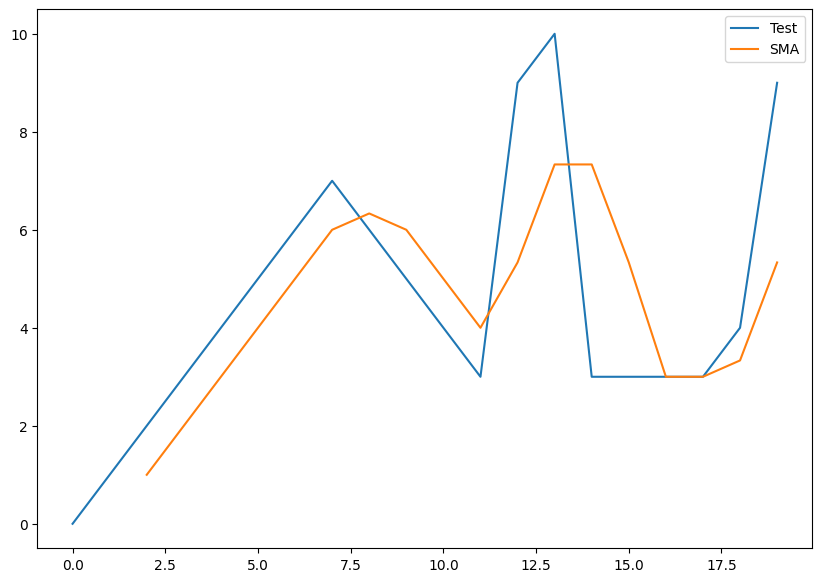

In [10]:
data = pd.DataFrame([0,1,2,3,4,5,6,7,6,5,4,3,9,10,3,3,3,3,4,9], columns=["Test"])
data["SMA"] = data.rolling(3).mean()
data.plot()

In [11]:
df["SMA"] = df["Adj Close"].rolling(window=200).mean()
df

,Adj Close,SMA
Datetime,,
2023-07-03 09:30:00,192.940002,NaN
2023-07-03 10:00:00,192.914993,NaN
2023-07-03 10:30:00,191.979004,NaN
2023-07-03 11:00:00,192.354996,NaN
2023-07-03 11:30:00,192.229996,NaN
...,...,...
2023-07-28 13:30:00,195.725006,192.342029
2023-07-28 14:00:00,196.090195,192.363717
2023-07-28 14:30:00,195.929993,192.382718


From the above output, you can see the first rows are of value `NaN`. This is because a lookback period (200 in this case) of the Adj Close column has not been achieved for the rows with index value of <200. We need 200 rows of data to calculate are first SMA value. For example, say you are on day 1, do you have 200 days before to calculate the moving average? No, right? So we must start from day 200 and the days before are going to be `NaN` therefore.

Now if we are to proceed and run a backtest for an algorithm which relies on this 200 day SMA from the 03/07/2023, our script will not run appropriately. We must either start the backtest from the index where we have the necessary information (starting from 200 indexex in where we have our first 200 day SMA value), or in our pre-processing stage, remove the `NaN` values by the following code.

,Adj Close,SMA
Datetime,,
2023-07-25 14:30:00,193.940002,191.674262
2023-07-25 15:00:00,194.274994,191.680937
2023-07-25 15:30:00,193.630005,191.684512
2023-07-26 09:30:00,193.649994,191.692867
2023-07-26 10:00:00,193.979996,191.700992
2023-07-26 10:30:00,194.410599,191.711895
2023-07-26 11:00:00,194.240005,191.722520
2023-07-26 11:30:00,194.779999,191.735170
2023-07-26 12:00:00,194.509995,191.746545


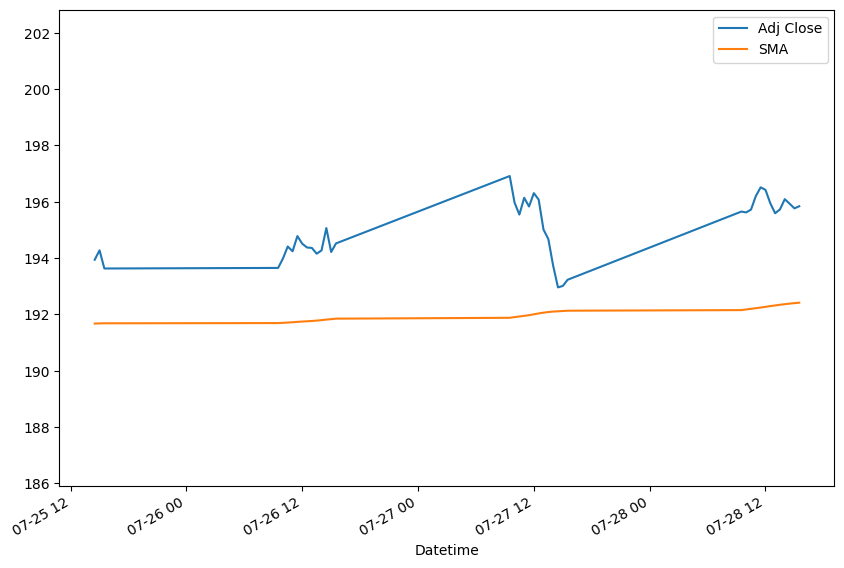

In [12]:
df=df.dropna(axis=0)
ax = df.plot()


## --- You can ignore this part, I'm using it to graph nicely ----

# We set the y axis lower and upper limits to be 97% of min and 103% of max
# This is so the graph is just below min and just above max
# I just want the min out of ALL values so I flatten to a 1D list
df_flattened = df.to_numpy().flatten()
ax.set_ylim([0.97*min(df_flattened),1.03*max(df_flattened)])

# Output the dataframe
df

Now all the rows with a value of 'NaN' have been removed, allowing us to proceed with our testing.

---

### Scaling Data

The next scenario I would like to cover is the concept of scaling down data (also called normalisation), mainly required for Neural Network training or machine learning algorithms.

Scaling takes place as it is known to improve the machine learning process. Some resources on this topic:
- [Why is scaling good for Deep Learning (DL)](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)
- [Feature Scaling in Machine Learning](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)
- [How to use StandardScaler and MinMaxScaler in python](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)

Scaling data means changing a stock price which ranges from £120 - £180 down to between a range of 0:1 or -1:1. Here I will demonstrate MinMaxScaler where the formula is defined in the equation below. Note this transformation is often used as an alternative to zero mean, unit variance scaling. Here are the two key formulas for scaling down, and scaling up data, respectively. 

$$X_{scale-down}=\frac{x_{i}-x_{min}}{x_{max}-x_{min}}$$

$$X_{scale-up}=X_{scale-down}*(x_{max}-x_{min})+x_{min}$$

- $X_{scale-down}$ : scaled down data 
- $X_{scale-up}$ : scaled up data
- $x_i$ : Is each input value at timestep $i$
- $x_{min}$ : Minimum of all input values in the dataset
- $x_{max}$ : Maximum of all input values in the dataset

Ensure that your dataset which you are scaling is in the format of a dataframe, a single series column will not be scaled down, but a single dataframe column will be, convert a series to dataframe. This is shown below.

It is also useful to learn about quickly graphing your datasets. Pandas dataframes come with `.plot()` ([pandas DataFrame plot docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html), [Pandas plotting quick look](https://www.w3schools.com/python/pandas/pandas_plotting.asp)) function. If the dataframe already has an index, (this one does since we have Datetime as shown before), we can omit the `y="..."`

There is more on plotting later on in this guide.

Text(0.5, 0, 'Date')

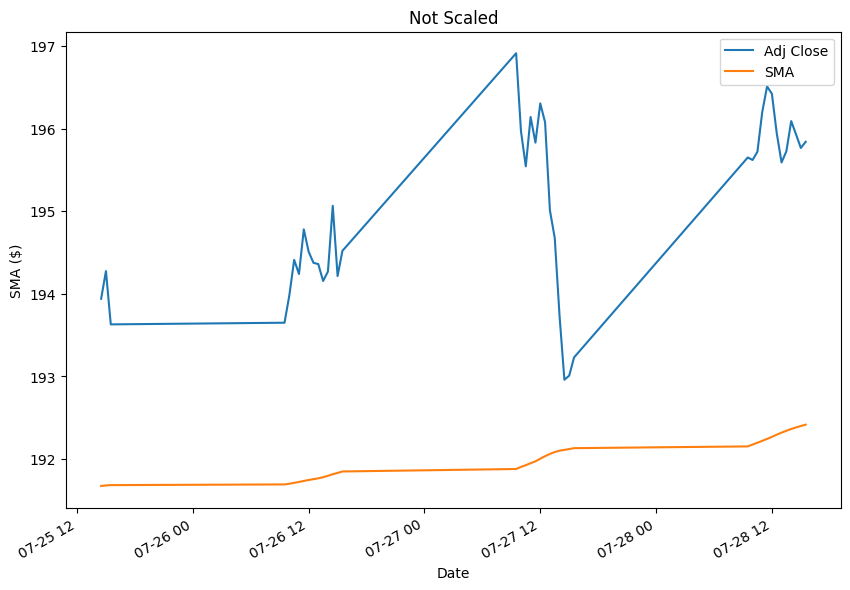

In [13]:
ax = df.plot()
ax.set_title("Not Scaled")
ax.set_ylabel("SMA ($)")
ax.set_xlabel("Date")

Before proceeding, please ensure you have the package scikit-learn installed (if you have not already from before).

This package is largely used in ML and has the pre-processing `MinMaxScaler` function avalible for use.

In [14]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


Importing the `MinMaxScaler` is done as below:

In [15]:
from sklearn.preprocessing import MinMaxScaler

Text(0.5, 0, 'Date')

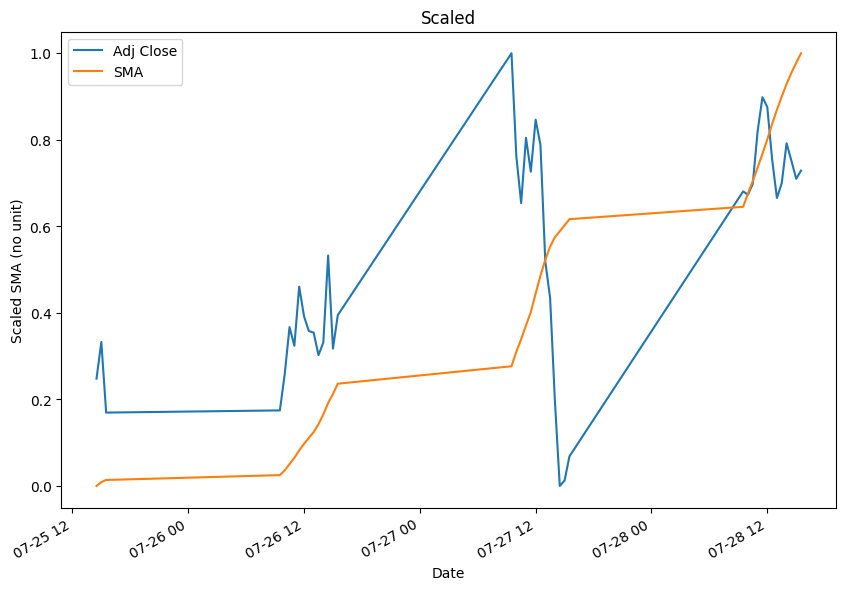

In [16]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
ax = scaled_df.plot()
ax.set_title("Scaled")
ax.set_ylabel("Scaled SMA (no unit)")
ax.set_xlabel("Date")

As you are tranforming your data from unscaled to scaled, it is highly crucial you store the min values and max values associated with a specific column which has undertaken scaling. In the case of using a library like `MinMaxScaler`, just store the object that you use to `fit` (dataset the scaler used on, and therefore changes the scaling parameters).

This is often overlooked and if scaling new incoming data is required, it may be done incorrectly ([Data Snooping](https://datascience.stanford.edu/news/data-snooping)).

Inversely scaling data may be done incorrectly. Therefore, storing the min() and max() values (or scaler) from the data will allow you to scale the data down with the same values which was used to scaled down the original dataset to train your NN or ML model.

Now if you scale down new incoming data with these stored min() and max() values you may find your outputs being <0 or greater then 1 ($X_{scaled}<0$ and $1<X_{scaled}$), this is normal and expected, since the scaler is trained on the first dataset. As long as the future data are scaled relative to the scaler used for the orignal dataset, the models will then perform as expected on that data.

The name of the issue which associates with not storing the scaler's min or max values is known as [Data Snooping](https://datascience.stanford.edu/news/data-snooping), if you scale down a test data set and a train data set seperately, where your model will be trained on the scaled training data set, when you test your model on a seperated scaled testing dataset, your output results will be incorrect (data snooping), to avoid this, on all data to scale down, use the associated min() and max() values to the original scaling of data. E.g. when running a live implementation, and incoming data must be scaled by the orignal min() max() values which associate with the model's scaled training dataset. 

An easy to imagine example: 
- Take a model trained on a dataset that has been scaled down. If you want to apply the model on another dataset and you scale it separately, the values from the initial dataset (which the model knows) are not relative to the second dataset. Therefore the model will be confused. So please ensure you use the same scaler to scale down new incoming data.

In [17]:
min_values = scaler.data_min_
max_values = scaler.data_max_

print(f"Min values used in scaling | Columns: {df.columns.values} | Values: {min_values}")
print(f"Max values used in scaling | Columns: {df.columns.values} | Values: {max_values}")

Min values used in scaling | Columns: ['Adj Close' 'SMA'] | Values: [192.96000671 191.67426239]
Max values used in scaling | Columns: ['Adj Close' 'SMA'] | Values: [196.9118042  192.41639275]


---
## Datasets and Neural Nets
Finally, I would like to touch on how data is often recieved by a Neural Network (NN) and some Deep Learning (DL) models.

The input data is often a 2, 3, 4 or higher dimensional data structure. All inputs have a batch size as the first input dimension. The latter dimensions are for actual inputs.

$$
(\text{BATCH\_SIZE},\space \text{input\_dim\_}1,\space \text{input\_dim\_}2, ...)
$$

For example, if we have 5 features and we're inputting 10 days worth of data, our shape will be $(10,5)$. If we have 32 batches per training epoch the final dimensions of the input will be:
$$
(32, 10, 5)
$$

The back-end programming on NNs are designed to not use an iterative loop feeding in a window to the NN training function. It needs to be a single input of the whole dataset, the back-end programming is aware and it expects input of (x,y,z). Where x in the number of windows we have generated (batch size), y is the lookback period for the windows (inputs), z is the input features.
A function to help organise the data so it is feed into the NN correctly is the one produced below. This function also creates the test variable 'y'. Note that the formatting here is using the information known up to this current point in time (via index slicing, up to but not inlcuding 'i'), to predict a certain value at the next point in time (via index extraction for 'i'). If this is not correctly programmed, you will encounter mirroring issues (look ahead bias), resulting in inaccurate results. 

In [18]:
def create_dataset(spy_data, look_back):
    X, y = [], []
    for i in range(look_back, len(spy_data)-1):
        X.append(spy_data[i-look_back:i, :])
        y.append(spy_data[i, 0])    # i here, as [...:i] from previous line is upto but not including i
    return np.array(X), np.array(y)

Also, we are mainly using [Tensorflow](https://www.tensorflow.org/) in-house but are open to other popular ML libraries such as [PyTorch](https://pytorch.org/).

Installing tensorflow: [Installing](https://www.tensorflow.org/install). 
- Ensure you install the version that utilizes a GPU if your computer has a dedicated graphics card.


If you would like to get started check out these resources:
- [Tensorflow Tutorials](https://www.tensorflow.org/tutorials) : Bring you up to scratch with tensorflow and implementing the basics all the way up to advanced deep learning architectures.
- [Uni of Chicago Neural Nets Maths](https://math.uchicago.edu/~may/REU2018/REUPapers/Guilhoto.pdf) : Overview of maths behind the neural networks. (It may be boring but you should aim to understand some of the maths to help you build better DL architectures)
- [Transformer Encoder Decoder Paper](https://arxiv.org/abs/1706.03762) : Title attention is all you need, one of the founding papers in training LLMs such as ChatGPT etc. A **very** good read (albeit boring again)
- [Tutorial implementing a Transformer](https://www.tensorflow.org/text/tutorials/transformer) : Tensorflow tutorial on implementing a transformer encoder decoder. Gives you insight into building a DL architecture.
- [CodeEmporium Youtube Page](https://www.youtube.com/@CodeEmporium) : Very in-depth explanations on ML / DP topics.
- [3Blue1Brown Youtube Page](https://www.youtube.com/@3blue1brown) : Very in-depth and intuitive explanations on ML/DP topics + general maths videos too.


Creating datasets ([tensorflow dataset docs](https://www.tensorflow.org/datasets)) in `tensorflow` is easier, as shown below.

There are some advantages to using the tensorflow `Dataset` class over regular dataframes:
1. They integrate with tensorflow well (you can easily make batches with this for a low computation cost vs. dataframes)
2. They have extra features as show below, such as generating windows
3. They have a low computation cost due to the lazy loading (they only load values needed at runtime, which saves memory and time)
    - [Dataset performance](https://www.tensorflow.org/guide/data_performance)

In [19]:
import tensorflow as tf


def create_ds(df, batch_size=1, window_size=3):
    # Convert dataframe or pd.Series to tensorflow dataset
    ds = tf.data.Dataset.from_tensor_slices(df.to_numpy())

    # Do some stuff (we want to generate windows)
    ds = ds.window(size=window_size, shift=1)           # Generate windows
    ds = ds.flat_map(lambda x: x.batch(window_size))    # Generate batches from the windows
                                                        #    - (need this idk why they made it so hacky)
                                                        #    - Maps each window to a synthesisable batch
    ds = ds.batch(batch_size=batch_size)                # Put dataset into batches
    ds = ds.prefetch(tf.data.AUTOTUNE)                  # Prefetch some data, better than fetching one by one,
                                                        #  we can fetch a block at a time
                                                        #    - Autotune tells tensorflow to get the best param for this itself.

    # Return the tensorflow dataset
    return ds

ds = create_ds(df["SMA"])

# Printing from the dataframe. Need to use .take() method
# - (since we do lazy loading, we have to force tensorflow to load some amount so we can introspect)
# - Prints 4 batches
for batch in ds.take(4):
    # # print(dir(batch))
    # print(dir(batch._variant_tensor))
    # print(batch._variant_tensor.numpy)
    print(batch)

tf.Tensor([[191.67426239 191.68093735 191.68451241]], shape=(1, 3), dtype=float64)
tf.Tensor([[191.68093735 191.68451241 191.69286736]], shape=(1, 3), dtype=float64)
tf.Tensor([[191.68451241 191.69286736 191.70099236]], shape=(1, 3), dtype=float64)
tf.Tensor([[191.69286736 191.70099236 191.71189537]], shape=(1, 3), dtype=float64)


# Defining Import variables - for results storing

This is a crucial part of any script, and is required when you need to store a result before carrying on with the testing code. Here I will glance over a basic way to store crucial information, and an example where it can be used.

If you are testing a range of values for a __*specific parameter*__ to analyse how it may impact your algorithms results, a simple way to store all your results is in a python `list`.
- Whenever a new value of this parameter is being tested, it may now result in a new profit, you will need to store this profit, then upon the next iteration you will store the updated profit with another tested value for the parameter.

Another example is using cross fold validation for hyperparameter optimisation, you may have $k$ cross folds (*discussed further in chapter 'Train-Validation-Test split, cross fold validation and optimising of parameters*) where you will test a range of values for the hyperparameter.
- Therefore, for each fold of this cross validation for a given hyperparameter value, you will want to store all the validation losses, then take a mean average and store the mean validation loss for the cross folds, then you will proceed to test another hyperparameter value and store its calculated validation loss mean for its' cross folds. Finally, you will pick the hyperparameter value which corresponds to the lowest mean validation loss when it has been tested on all the cross folds. This sounds slightly confusing, after practice this will become more familiar. 
- e.g. +0.01 of the original hyperparameter value

Resources:
- [Machine Learning Guide](https://www.simplilearn.com/tutorials/machine-learning-tutorial) : What steps are there when you build a "model"?
- [Parameter vs Hyperparameter](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/) : What is a hyper-parameter? How is it different to a model's parameter?
- [Intro to k-fold Cross Validation](https://machinelearningmastery.com/k-fold-cross-validation/) : What is cross validation and why do I need it?

### Steps

Firstly, defining an empty list.

In [20]:
ROIs=[]
print(ROIs)

[]


Secondly lets add a result to this list ROIs (a list storing all the returns on investments for every trade our algorithm makes).

In [21]:
buy_price=200
sell_price=220
ROI=(sell_price-buy_price)/buy_price
ROIs.append(ROI)
print(ROIs)

[0.1]


__Important__ metrics which can be calculated and stored for your algorithm (there are many more! But this is a starting point).

1. Returns from individual trades (ROIs as shown above).
2. Number of trades your algorithm makes.
3. Number of winning and losing trades your algorithm makes (ROI>0 and ROI<0 respectively).

You may wonder why we need these metrics in the first place. Think about how you determine if a model is performing correctly. How do you know if a model is doing what *you* want it to do well? There may be many different ways of quantitatively measuring this and that is where the usage of the different types of metrics come in.

In [22]:
Trades=0
winning_trades=0
losing_trades=0

#Iteration through data begins
Trades+=1
if ROI>0:
    winning_trades+=1
elif ROI<0:
    losing_trades+=1

4. [__Maximum equity drawdown__](https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp) of your portfolio.
- Represents the $\%$ drop in your portfolio value from the highest value $\to$ lowest value.
- The idea of this is upon the training, validation and testing, we know what to expect when running the algorithm live, without essentially going into panic. 
- Single value not a list of values
- This is typically calculated at the end, but we can calculate this value from the function below. We need to make a list where we can store the account balance throughout the trading period. Account balance is updated at every iteration usually, or everytime our algorithms compute a trade which will have resulted in an ROI from that specific trade. Therefore the account balance is updated using the latest trades ROI. From this list of account balance values, the function below helps us compute our maximum equity drawdown of our portfolio. (*This function will produce an error if the balance increases and never takes a decrease, hence as there will have been no equity drawdowns*).

In [23]:
def Max_equity_drawdown_calc(Account_Balance_Over_Time):
    if not Account_Balance_Over_Time:
       return 0
    else:
       max_val_lookforward=max(Account_Balance_Over_Time)
       max_index_lookforward=Account_Balance_Over_Time.index(max_val_lookforward)
       min_val_lookforward=min(Account_Balance_Over_Time[max_index_lookforward:])

       min_val_lookbackward=min(Account_Balance_Over_Time)
       min_index_lookbackward=Account_Balance_Over_Time.index(min_val_lookbackward)
       max_val_lookbackward=max(Account_Balance_Over_Time[:min_index_lookbackward-1])

       lookforward_equity_drawdown=(max_val_lookforward-min_val_lookforward)/max_val_lookforward
       lookbackward_equity_drawdown=(max_val_lookbackward-min_val_lookbackward)/max_val_lookbackward

       equity_drawdown=round(max(lookforward_equity_drawdown, lookbackward_equity_drawdown)*100,1)
       return equity_drawdown

5. The __maximum equity drawdown from a single trade__ 
- This is the same as above, but from your list ROIs, you will extract the max equity drawdown via `Max_equity_drawdown_single_trade=min(ROIs)`.
- During the testing stage we may have a single trade that loses us $20\%$ of our entire portfolio, but overall our portfolio still outpreforms the S&P 500. Therefore, when running this algorithm live we should not panic or become concered if we experienced a significant drop from a single trade.
- Single value not a list of values. 

6. If you assign a starting balance to your trading algorithm, then this balance needs to be updated by the least after each trade is made.
- Going further you are recommended to update your account balance even when your positions are open, for an accurate representation of live trading.
- This list is required when you calculate you portfolio's maximum equity drawdown.

Simple *pseudo*code to update the balance is shown below:

In [ ]:
Account_Balance=100
Account_Balance_Over_Time=[]
#Iteration through data begins
    ## Sell condition is met
    ROI=(sell_price-buy_price)/buy_price
    Account_Balance*=(1+ROI)
    Account_Balance_Over_Time.append(Account_Balance)

# Programming a buy and sell signal (opening and closing of a position)

There is not one solution to this, you must think logically about how your algorithm works. I will provide examples based on certain trading algorithms including simple regression, momentum, and portfolio optimisation which can be applied to your algorithm.

## Simple regression

For regression algorithms ([What is regression?](https://www.investopedia.com/terms/r/regression.asp)), you need to generate [long or short](https://www.investopedia.com/ask/answers/100314/whats-difference-between-long-and-short-position-market.asp) signals (or [Orders](https://www.investopedia.com/terms/o/order.asp)) depending on if you predict the price:
- Moving up   : You generate a __long__ signal
- Moving down : You generate a __short__ signal

If no dynamic size positioning is taking place, no hedging is taking place, and you are not working with a basket of equities, then we will assume you invest 100% of your available account equity in this trade.

Here the coding logic of opening and closing positions is from 'if' statements. 

Firstly, I will run through the basic code for opening and closing a long position. Then I will run through the basic code for opening and closing a short position (as the short positioning works slightly [differently](https://www.investopedia.com/terms/s/shortselling.asp):
    - borrowing shares and selling them ASAP, hoping to buy them back at a cheaper price in the future and then returning the borrowed shares back to their rightful owner).

Here, df represents the asset prices through history or a simulation and assume we are predicting the opening value and trading this opening value. Additionally, when closing positions, there are some important metrics we need to consider (some of them have been discussed in the above chapter), such as:
- ROI,
- number of trades made,
- winning or losing trades,
- our updated account balance,
- storing the ROI is a list of all ROIs and
- storing the updated account balance in a list to show how it changes through time (when post-processing the results). 

---
Below we show an example of setting those positions.

In [26]:
predicted_price = 194.00

# Let's download the data
ticker = 'AAPL'
start = '2020-01-01'
df = yf.download(ticker, start, interval='1d')

[*********************100%***********************]  1 of 1 completed


### Quick Aside: Plotting Candlesticks

There are many python libraries out there for graphing. The three major ones are:
- `matplotlib` : General backbone for all python plotting
- `seaborn` : Good for data visualisation, very clean
- `plotly` : Also good for data visualisation, gives the ability to do more advanced graphing

We can use `plotly` to plot candlesticks as below:


Resources:
- Candlestick Charts in Python - https://plotly.com/python/candlestick-charts/

In [27]:
!pip install plotly


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [28]:
import plotly.graph_objects as go

candlestickData = go.Candlestick(
    x = df.index,
    open  = df["Open"],
    high  = df["High"],
    low   = df["Low"],
    close = df["Close"]
)
fig = go.Figure(data = candlestickData)

# Disable range slider
# fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

## Setting Positions

#### Long Positions

In [ ]:
## Loop through historical data / a simulation has begun, where 'i' represents the current point in time.
if predicted_price>current_price and open_position==0:
    open_long=df.iloc[i]
    open_position=1
elif predicted_price<current_price and open_position==1:
    close_long=df.iloc[i]
    revenue_from_trade=close_long-open_long
    ROI=(close_long-open_long)/open_long
    ROIs.append(ROI)
    Updated_bal*=(1+ROI)
    Account_Bal_Through_Time.append(Updated_bal)
    Trades+=1
    open_position=0
    if ROI>0:
        wining_trades+=1
    else:
        losing_trades+=1

#### Short Positions
Example of short market signalling for regression strategies. Notice how the signs are flipped when opening or closing a position.

In [ ]:
## Loop through historical data / a simulation has begun, where 'i' represents the current point in time.
if predicted_price<current_price and open_position==0:
    open_short=df.iloc[i]
    open_position=1
elif predicted_price>current_price and open_position==1:
    close_short=df.iloc[i]
    revenue_from_trade=open_short-close_short
    ROI=(open_short-close_short)/open_short
    ROIs.append(ROI)
    Updated_bal*=(1+ROI)
    Account_Bal_Through_Time.append(Updated_bal)
    Trades+=1
    open_position=0
    if ROI>0:
        wining_trades+=1
    else:
        losing_trades+=1

Now if you run a regression strategy which trades both long and short directions as opposed to just a long or just a short. Here is a combined code for the two scenarios.

The first 2 condidtions allow our very first trade to be either a long or a short position. This code can be simplified through functions and using exact variable values rather then doing integer locator, but I have expanded it to try and make it as clear as possible as to what is going on. 

In [ ]:
## Loop through historical data / a simulation has begun, where 'i' represents the current point in time.
if predicted_price>current_price and open_short_position==0:
    open_long=df.iloc[i]
    open_long_position=1
    
elif predicted_price<current_price and open_short_position==0:
    open_short=df.iloc[i]
    open_short_position=1
    
elif predicted_price<current_price and open_long_position==1:
    close_long=df.iloc[i]
    revenue_from_trade=close_long-open_long
    ROI=(close_long-open_long)/open_long
    ROIs.append(ROI)
    Updated_bal*=(1+ROI)
    Account_Bal_Through_Time.append(Updated_bal)
    Trades+=1
    if ROI>0:
        wining_trades+=1
    else:
        losing_trades+=1
        
    open_long_position=0
    open_short=df.iloc[i]
    open_short_position=1
        
elif predicted_price>current_price and open_short_position==1:
    close_short=df.iloc[i]
    revenue_from_trade=open_short-close_short
    ROI=(open_short-close_short)/open_short
    ROIs.append(ROI)
    Updated_bal*=(1+ROI)
    Account_Bal_Through_Time.append(Updated_bal)
    Trades+=1
    if ROI>0:
        wining_trades+=1
    else:
        losing_trades+=1
    
    open_short_position=0
    open_long=df.iloc[i]
    open_long_position=1

## Momentum strategy

With [momentum strategies](https://www.investopedia.com/terms/m/momentum_investing.asp), you are aiming to identify an upcoming upwards or downwards trend, which is signalled by a certain condition.

When to close this position is not a specific answer, however some simple ideas on how to trade this strategy would be:
- close the position when the inverse of the opening position signial is met
- using a take profit level with a [stop loss](https://www.investopedia.com/terms/s/stop-lossorder.asp), or using a [trailing stop loss](https://www.investopedia.com/terms/t/trailingstop.asp).

In [ ]:
## Loop through historical data / a simulation has begun, where 'i' represents the current point in time.

def Golden_Cross_Over(df_open, I, original_num_col):   ##### Open position
    C=0
    for X in range(original_num_col, (df_open.shape[1]), 2):
        tday_short_SMA=df_open.iloc[I,X]
        yday_short_SMA=df_open.iloc[I-1,X]
        tday_long_SMA=df_open.iloc[I,X+1]
        yday_long_SMA=df_open.iloc[I-1,X+1]
        if tday_short_SMA>tday_long_SMA and yday_short_SMA<yday_long_SMA:
            index=X-original_num_col-C
            buy_price=df_open.iloc[I,index]
            open_position=1
            Stoploss=0.97*buy_price
            TPLevel=buy_price*1.03
            return buy_price, open_position, index, C, X, Stoploss, TPLevel
        C+=1
    return 0,0,0,0,0,0,0

def Red_Cross_Over(df_open, I, original_num_col, buy_price, index, C):  ### Close position check
    X=index+original_num_col+C
    tday_short_SMA=df_open.iloc[I,X]
    yday_short_SMA=df_open.iloc[I-1,X]
    tday_long_SMA=df_open.iloc[I,X+1]
    yday_long_SMA=df_open.iloc[I-1,X+1]
    revenue=0
    open_position=1
    if tday_short_SMA<tday_long_SMA and yday_short_SMA>yday_long_SMA:
        sell_price=df_open.iloc[I,index]
        revenue=sell_price-buy_price
        ROI=(sell_price-buy_price)/buy_price
        open_position=0
        return revenue, open_position, ROI
    return 0, 1, 0

def Stop_Loss(df_open, I, buy_price, index, Stoploss, C):  ### Close position check
    current_price=df_open.iloc[I,index]
    if current_price<Stoploss:
        sell_price=df_open.iloc[I,index]
        revenue=sell_price-buy_price
        ROI=(sell_price-buy_price)/buy_price
        open_position=0
        Stoploss=0
        return revenue, open_position, Stoploss, ROI
    
    elif current_price>=df_open.iloc[I-1,index]:
        Stoploss=current_price*0.98
        revenue=0
        ROI=0
        open_position=1
        return revenue, open_position, Stoploss, ROI
    elif current_price<df_open.iloc[I-1,index]:
        Stoploss=Stoploss
        revenue=0
        ROI=0
        open_position=1
        return revenue, open_position, Stoploss, ROI
    
def Take_Profit(df_open, I, buy_price, TPLevel):     ### Close position check
    current_price=df_open.iloc[I,index]
    if current_price>TPLevel:
        sell_price=df_open.iloc[I,index]
        revenue=sell_price-buy_price
        ROI=(sell_price-buy_price)/buy_price
        open_position=0
        return revenue, open_position, ROI
    else:
        return 0, 1, 0

for I in range(1, len(df_open)-1):  ## Run our main iterator
    if open_position==0:    
        buy_price, open_position, index, C, X, Stoploss, TPLevel=Golden_Cross_Over( df_open, I, original_num_col)
    if open_position!=0:
        days_held+=1
    if open_position !=0:
        revenue, open_position, ROI = Red_Cross_Over(df_open, I, original_num_col, buy_price, index, C)
    if open_position !=0:
        revenue, open_position, Stoploss, ROI = Stop_Loss(df_open, I, buy_price, index, Stoploss, C)
    if open_position !=0:
        revenue, open_position, ROI = Take_Profit(df_open, I, buy_price, TPLevel)
    bps.append(buy_price)
    Bal_Part1*=(1+ROI)
    Updated_Bal_Part1.append(Bal_Part1)
    Bal_Part2*=(1+(spy_data.iloc[I]-spy_data.iloc[I-1])/spy_data.iloc[I-1])
    Updated_Bal_Part2.append(Bal_Part2)
    if revenue!=0:
        Total_Rev+=revenue
        Revenue_from_Trades.append(revenue)
        Holding_periods.append(days_held)
        ROIs.append(ROI)
        ROI=0
        revenue=0
        days_held=0
        Trades+=1

## Portfolio Optimisation

This is a more complex scenario. With a portfolio, you have multiple [securities](https://www.investopedia.com/terms/s/security.asp) which you can trade. Often when trading a group of securities, you may assign various weights to these securities, where a weight represents the proportion of your available equity which is to be invested into that corresponding security. The portfolio weights are updated usually after a certain period of time, also known as the rebalance period. 
- For example, 20% of your portfolio is AAPL, 40% is MSFT, 40% is TSLA etc.

`Daily_return_calc` is a function which takes in the weights, where the weights are stored in a vector, and each weight is specific to an individual equity. This simulation is carefully considered. The weights must be optimised based on the limited available information we have, with __no input from the true future price__ of the asset. In this function the weights have been calculated based on the information up to, but not including the current row (which represents the end of the rebalance period). Now that the weights have been decided for this rebalance period, we can input them into this function and determine how much return we would of made over this period, before a new rebalance happens. 

> Note: the columns in the df, represent different equities and we therefore extract two vectors, the current row (price action of the equities at the end of the rebalance period) and the previous row (the price of the equities when we opened our positions with our new weights). From here we can work out the actually return which occured if we did make this investment. To calculate the actual return for a rebalance period we want to preform the dot product of the weights and their corresponding return over this specific period.

$$(\mathbf{R} \cdot \mathbf{W})_t = \sum_{i=1}^{n} r_i w_i$$
- $\mathbf{R}$ : Row vector of returns for each equity
- $\mathbf{W}$ : Column vector of weights for each equity (for given period of investment, we use a single rebalance period)
- $w_i$ and $r_i$ : Individual element in the respective vectors
- $n$ : Number of equities considered by our portfolio

To calculate the new balance of our portfolio, we use the equation below:
$$Bal_{t+1} = Bal_{t}(1+(\mathbf{R_t} \cdot \mathbf{W_t}))$$

- $Bal_{t+1}$ : Balance at next timestep, based on our returns
- $Bal_{t}$ : Balance of portfolio at current point in time
- $(\mathbf{R_t} \cdot \mathbf{W_t})$ : Returns based on our returns and weights for each equity


Resources:
- Modern Portfolio Theory - https://www.investopedia.com/terms/m/modernportfoliotheory.asp
- MPT Theory - https://bookdown.org/probability/statistics/introduction-to-regression.html#modern-portfolio-theory

In [ ]:
def Daily_return_cal(df, weights, i, N, Balance, Win_trades, Lose_trades):
    returnsX=((df.iloc[N+i,:]
              -df.iloc[N+i-1,:])
              /df.iloc[N+i-1,:])
    Total_ret=0
    
    Total_ret = np.dot(weights, returnsX)

    Balance+=Balance*(Total_ret)
    
    Total_ret=Total_ret*100
    
    if Total_ret>0:
        Win_trades+=1
    else:
        Lose_trades+=1
    
    return returnsX, Total_ret, Balance, Win_trades, Lose_trades

# Train-Validation-Test split, cross fold validation and optimising of parameters

The [train-validation-test](https://machinelearningmastery.com/training-validation-test-split-and-cross-validation-done-right) split should ideally come into data pre-processing. But this section is important and deserves a chapter for itself. 

Firstly, when we have a dataset, we need to make 3 splits (sometimes 2: train & test):
- the training set,
- validation set,
- and the test set.

([Why?](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/))

Below I will present the __Amazon__ stock Adjusted Closing price (unscaled, then scaled), then with 3 splits. Later in this section we will dicuss the issue of [information leakage](https://machinelearningmastery.com/data-leakage-machine-learning/) which is often overlooked and a simple method to resolve this issue.

Firstly, the training dataset is used to train parameters. Parameters can be optimised by reducing a given [loss function](https://developers.google.com/machine-learning/crash-course/descending-into-ml/training-and-loss), e.g. MSE (L2 norm). Ideally, when preforming a regression task you would like to [minimise](https://developers.google.com/machine-learning/crash-course/reducing-loss/video-lecture) this loss function, this can be achieved through
- [gradient desecent](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) (an iterative process, where you take small steps towards the minima)
- solving using mathematics (e.g. [Linear Regression with MSE](https://www.cs.princeton.edu/courses/archive/fall18/cos324/files/linear-regression.pdf))

Additionally, when you are preforming [supervised learning](https://www.ibm.com/topics/supervised-learning) where you have a training dataset you can achieve regression models which predict extremely accurately, perhaps even too accurately, this is known as an overfitting model ([Overfitting AWS Link](https://aws.amazon.com/what-is/overfitting/), [Overfitting MLM Link](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)). The methodolgy to avoid overfitting models is to incorporate a validation dataset into the training, which confirms whether the model is overfitted to the noise, or to a general underlying trend (which is our goal).
> Note: Validation is also used to compare the same model with different hyper-parameters

In the Figure 1 found in the Appendicies section, I have attached an image of the training results. This is taken from an XGBoosting algorithm used to predict the Adjusted Close for the S&P 500 (the code should be available on the GitHub). With [XGBoosting](https://www.nvidia.com/en-us/glossary/data-science/xgboost/), there is a specified number of boosting rounds, and a specified [learning rate](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/) (we will not go into detail on this here). The goal is to achieve the __lowest__ validation loss and identify which number of boosting rounds corresponds to minimal validation loss value. 

The column on the left is the MSE for the training dataset, as expected, the more boosting rounds we have, the better our model will fit the training data, the issue is (as mentioned before), fitting the data too well, aka overfit. We can check if our model is becoming overfitted or not by analysing the loss function output for the train and validation simultaneously. The following possible scenarios are:
1. If the training loss output is decreasing and the validation loss output is also decreasing, and you have reached the total number of boosting rounds for your model, you should update the number of boosting rounds by increasing the upper limit, allowing your model to achieve an even better fit.
2. If the train loss output is continuting to decrease, but the validation loss ouput has seemed to reached a minimal value and is now increasing as the number of boosting rounds increases, it is likely your model is starting to become overfit (this scenario is shown in Figure 1 below).

It is evident that the optimal number of boosting rounds to achieve a better XGBoost model in this case is around the value of ~100, from here you may wish to focus the boosting round range e.g. from 90 to 110, but with a deeper learning rate, e.g. 0.001 with the aim of finding a better fitted model to the validation loss. 


Resources:
- Google Developers ML Free Courses: https://developers.google.com/machine-learning/foundational-courses 

[*********************100%***********************]  1 of 1 completed


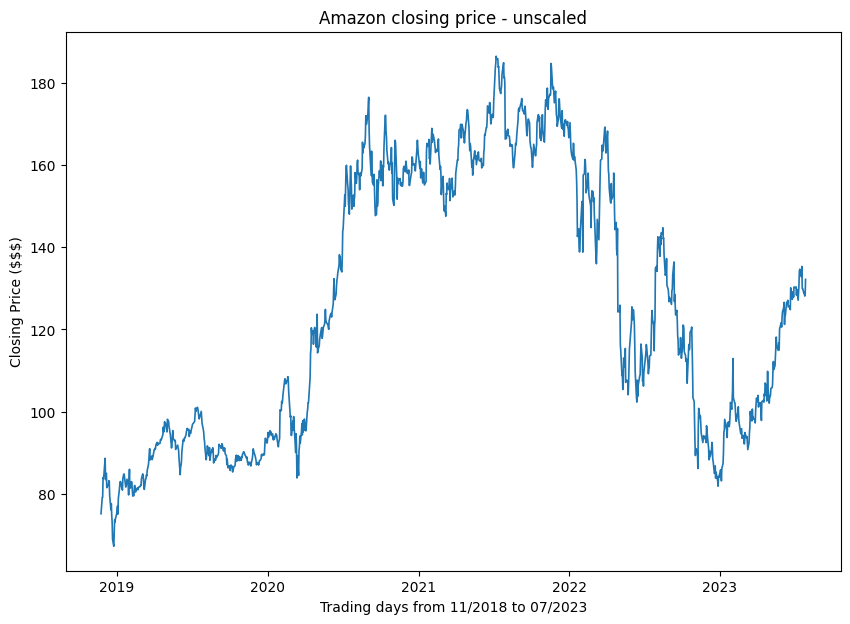

In [32]:
import random
import matplotlib.pyplot as plt
import yfinance as yf

ticker='AMZN'
start='2018-11-22'
end='2023-07-30'
df = yf.download(ticker, start, end)['Adj Close']

# Plot the list
plt.plot(df, linewidth=1.2)
plt.xlabel('Trading days from 11/2018 to 07/2023')
plt.ylabel('Closing Price ($$$)')
plt.title('Amazon closing price - unscaled')
plt.show()

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df=pd.DataFrame(df, columns=['Adj Close'])

# Reshape the 1D data to a 2D array-like format
data_2d = df['Adj Close'].values.reshape(-1, 1)

# Scale the data
scaled_data = scaler.fit_transform(data_2d)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=['scaled_column'])

# Print the scaled DataFrame
scaled_df

,scaled_column
0,0.066221
1,0.099424
2,0.099462
3,0.139810
4,0.138059
...,...
1171,0.516049
1172,0.518813
1173,0.510603
1174,0.511441


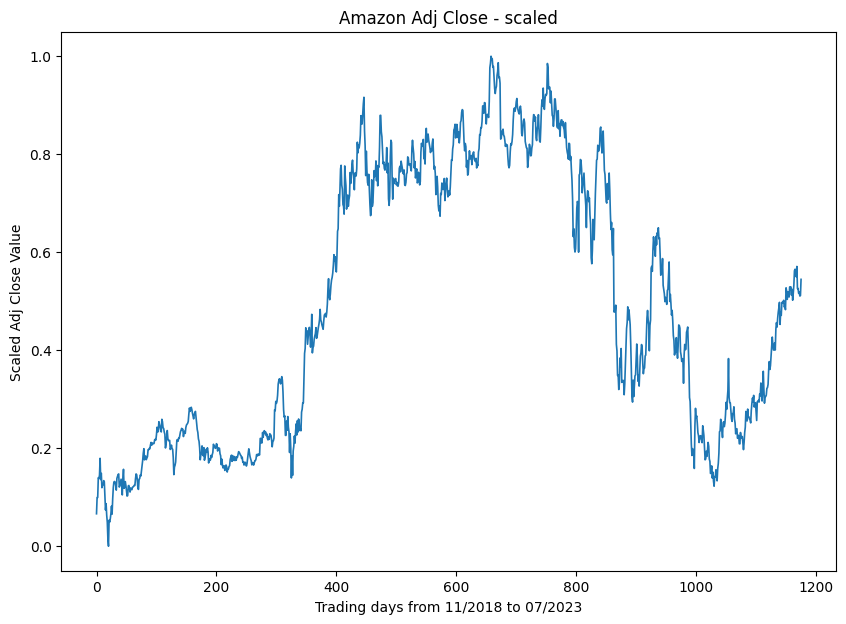

In [34]:
plt.plot(scaled_df, linewidth=1.2)
plt.xlabel('Trading days from 11/2018 to 07/2023')
plt.ylabel('Scaled Adj Close Value')
plt.title('Amazon Adj Close - scaled')
plt.show()

The code for producing a train-val-split. Here I have used
1. $80\%$ for training
2. $10\%$ for validation
4. $10\%$ for testing.

Please ensure `shuffle=False`, this means it will not mix the rows when splitting the data, we are running a sequential test through time.

In [61]:
from sklearn.model_selection import train_test_split

# Assuming you have your data in X (features) and y (target) variables

# Here, train is 80, test is 20
X_train, X_test = train_test_split(scaled_df, test_size=0.2, shuffle=False) 

# We split test 50-50 into val, test so each are overall 10% of the dataset
X_val, X_test = train_test_split(X_test, test_size=0.5, shuffle=False)

# Now X_train and y_train will contain 80% of your data (first 80%)
# And X_test and y_test will contain the remaining 20% (last 20%)

calculate_percent = lambda x : 100 * x.size / len(scaled_df)
print(f"Train shape: {X_train.shape} : ({calculate_percent(X_train) : .3f}%)"
    + f" | Val shape: {X_val.shape} : ({calculate_percent(X_val) : .3f}%)"
    + f" | Test shape: {X_test.shape} : ({calculate_percent(X_test) : .3f}%)")

Train shape: (940, 1) : ( 79.932%) | Val shape: (118, 1) : ( 10.034%) | Test shape: (118, 1) : ( 10.034%)


In the plot below is a visual representation of a classic test, val, train split.

Here, [backtesting](https://www.investopedia.com/terms/b/backtesting.asp) and some optimisation of parameters may occur.
> Cross validation is more suitable for parameter optimisation - covered later in this document, and also breifly mentioned earlier in this document.

However, there is an associated issue with the splitting of data in this manner known as [Information/Data Leakage](https://machinelearningmastery.com/data-leakage-machine-learning/).
> __Quotes from the link__: The goal of predictive modeling is to develop a model that makes accurate predictions on new data, unseen during training

Data leakage is when information outside the training dataset (what model actually knows) is used to create the model. The additional information allows the model to learn something it should not know. This invalidates the performance of the model. 
- The can cause an overly optimistic model and could also produce completely invalid predictive models.

In time series, data leakage is common during the process of the __Train-Val-Test split__. Due to the inherent nature of time series datasets, each data point is related to some $N$ points before it. Therefore, for example, even if we split the dataset:
- Some $n_{te}$ datapoints at the end of `train` are related to some $n_{vs}$ datapoints at the start of `val`.
- Some $n_{ve}$ datapoints at the end of `val` are related to some $n_{tts}$  datapoints at the start of `test`

As is evident, this occurs on the boundaries inbetween split datasets. The idea of this issue arises from the market being *inefficient*. If the market was perfectly efficient, then the price at the next point **does not** depend on what the price was previously. (See [Market Efficiency](https://www.investopedia.com/terms/m/marketefficiency.asp))


This is arguably not the case as many institutions run profitable momentum algorithms, proving there is *inefficiencies*. If we conclude that the price at the next point in time depends on the price at the current point in time (even by a miniscule amount) then the data split boundaries may provide a weakness to model training.

E.g. Take a 2 split dataset (train and test), based on our comments, our algorithm has familairity with where the asset price may be in the near future. You may think this is a good thing, however there are scenarios where this will be an issue:
1. Your model has only been trained on a single training dataset, and as it 'knowns' what may happen at the start of the testing dataset, your results may be significantly better then if you are to run it live with funds.
2. If the market is perfectly efficient and its future paths can be simulated by a range of Brownian motion random walks, your model will also lose funds when trading live.

A possible solution to this scenario is to remove a few observations around the dataset split boundaries, known as data purging. How many observations to remove, needs to be considered based on your number of total observations avaliable. In the figure below, I have not removed any observations around the data split boundaries. I will proceed onto that in another cell.


Resources
- Data Preperation without Data Leakage : https://machinelearningmastery.com/data-preparation-without-data-leakage/
- Combinatorial Purged Cross-Validation : https://stats.stackexchange.com/questions/443159/what-is-combinatorial-purged-cross-validation-for-time-series-data
- Guy who came up with it on twitter : https://twitter.com/maxxMMr/status/1244767406972702720

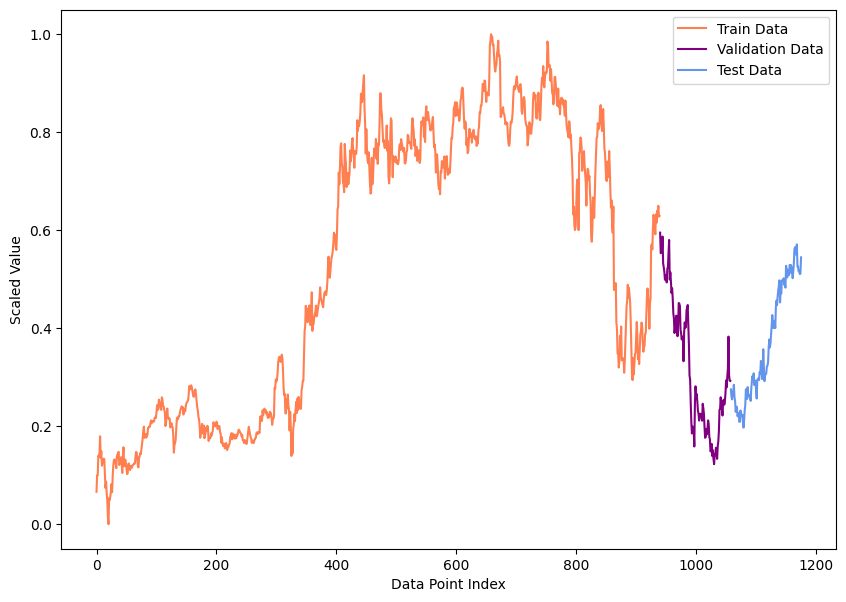

In [63]:
# Get the index where X_train ends and X_test starts
train_end = len(X_train)
val_end = len(X_train+X_val)

# Plot X_train in green up to the train_end index
plt.plot(np.arange(train_end), X_train, color='coral', label='Train Data')

plt.plot(np.arange(train_end, val_end), X_val, color='purple', label='Validation Data')

# Plot X_test in yellow from the train_end index to the end of the dataset
plt.plot(np.arange(val_end, len(scaled_df)), X_test, color='cornflowerblue', label='Test Data')

# Add labels and legend
plt.xlabel('Data Point Index')
plt.ylabel('Scaled Value')
plt.legend()

# Show the plot
plt.show()

#### Data Purging

The figure below represents a dataset now with the $10\%$ of observations around the train-val and val-test boundary removed, respectively.

1. Train boundaries : $0\to 90\%\times N_{train}$
2. Val   boundaries : $Val_{start} + 10\% \times N_{val}\to Val_{end} - 10\% \times N_{val}$
3. Test  boundaries : $Test_{start} + 10\% \times N_{test}\to Test_{end}$

Where the calculations are based off of:
- $Train_{start} \equiv 0$
- $Val_{start} \equiv Train_{end}$ 
- $Val_{end} \equiv Train_{end} + N_{val}$ 
- $Test_{start} \equiv Val_{end} \equiv Train_{end} + N_{val}$ 
- $Test_{end} \equiv Test_{start} + N_{test} \equiv Train_{end} + N_{val} + N_{test}$ 

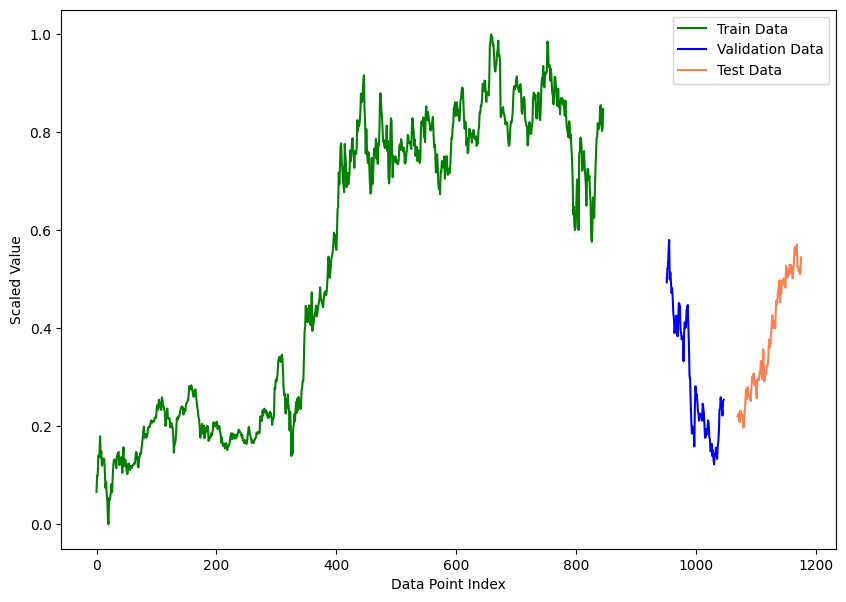

1047
846


In [77]:
train_cut_off = int(0.10 * len(X_train))
val_cut_off   = int(0.10 * len(X_val))
test_cut_off  = int(0.10 * len(X_test))

train_start = 0
train_end   = len(X_train) - train_cut_off

val_start   = len(X_train) + val_cut_off
val_end     = len(X_train) + len(X_val) - val_cut_off

test_start  = len(X_train) + len(X_val) + test_cut_off
test_end    = len(X_train) + len(X_val) + len(X_test)

# Plot X_train in green up to the train_end index
plt.plot(np.arange(train_start, train_end), X_train[:train_end], color='green', label='Train Data')
plt.plot(np.arange(val_start, val_end),     X_val[val_cut_off:len(X_val) - val_cut_off], color='blue', label='Validation Data')
plt.plot(np.arange(test_start, test_end),   X_test[test_cut_off:], color='coral', label='Test Data')

# Add labels and legend
plt.xlabel('Data Point Index')
plt.ylabel('Scaled Value')
plt.legend()

# Show the plot
plt.show()
print(val_end)
print(train_end)

#### Visual Representation of Data Purging
For visual representation of what exactly we are removing please view the plot below. 

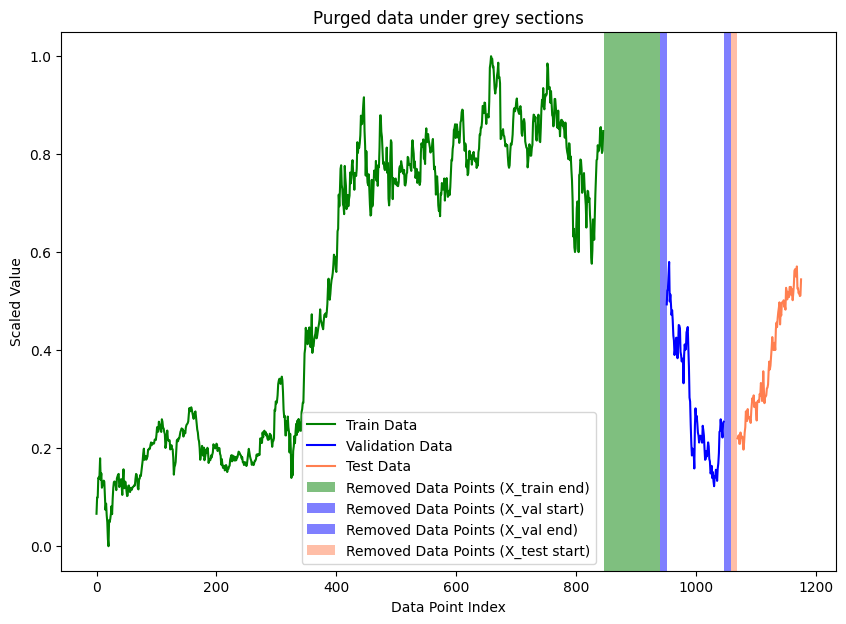

In [82]:
import matplotlib.pyplot as plt

# Assuming you have defined Cut_X_train, Cut_X_val, and Cut_X_test as mentioned in your code

# Plot X_train in green up to the train_end index
plt.plot(np.arange(train_start, train_end), X_train[:train_end], color='green', label='Train Data')
plt.plot(np.arange(val_start, val_end),     X_val[val_cut_off:len(X_val) - val_cut_off], color='blue', label='Validation Data')
plt.plot(np.arange(test_start, test_end),   X_test[test_cut_off:], color='coral', label='Test Data')

# Add labels and legend
plt.xlabel('Data Point Index')
plt.ylabel('Scaled Value')

# Add vertical lines to show the removed data points
# Black out the missing data points in X_train
plt.axvspan(len(X_train) - train_cut_off, len(X_train), facecolor='green', alpha=0.5, label='Removed Data Points (X_train end)')
plt.axvspan(len(X_train), val_start, facecolor='blue', alpha=0.5, label='Removed Data Points (X_val start)')
plt.axvspan(val_end, val_end+val_cut_off, facecolor='blue', alpha=0.5, label='Removed Data Points (X_val end)')
plt.axvspan(val_end+val_cut_off, test_start, facecolor='coral', alpha=0.5, label='Removed Data Points (X_test start)')
plt.title("Purged data under grey sections")

plt.legend()
# Show the plot
plt.show()


Next we will discuss the basis of [k-fold Cross Validation](https://machinelearningmastery.com/k-fold-cross-validation/).

K-Fold cross validation (kCV) is a clever topic towards hyperparameter optimisation and [nested cross validation](https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/). Prior to kCV we just considered a training dataset, validation dataset and a testing dataset.

A hyperparamter optimisation process on a very basic level will follow an iterative procedure to achieve the minimal value of a loss function, usually through a gradient descent process. Optimisation of a hyperparameter on a fixed training and validation dataset is much more of __forced__ hyperparameter optimisation process, you are taking a very niche historical dataset with the same repeating pattern being very unlikely to occur again in the future, and forced your parameters to fit this dataset very well.
- Now whilst this forced hyperparameter optimisation process isn't well considered, it may give you the edge to a regular retail investor.
- This is not a feasible approach for us. The first step in an attempt of removing this issue is the incorporation of CV into your model training.

> (Please refer to Figure 2 in the Appendicies for a visual representation).

kCV is when we take the training dataset (if you have 3 splits, take the training and validation, or just the training and then combined the validation and testing, as this fixed validation dataset is no longer needed). Next, you must define the number of cross folds you would like to considered, generally the more cross folds the less overfit your model will be whilst maintaining a minimal validation loss. Figure 2 in the appendicies takes 5 cross folds. Correspondingly, a range of parameters will be optimised on each of the training datasets (achieving the lowest loss function), once these parameters are optimised (gradient descent or grid search algorithm) on the training folds, then it is blind tested on the validation fold and an output of the loss function will be prodcued (aka the validation loss, e.g. MSE or others), for each validation fold the validation loss is stored. When all the folds have been a validation fold, the mean validation loss is taken. Now the parameters associated with the lowest mean validation loss will be taken forward for futher testing on the test dataset. Early stopping can occur if the parameter optimisation process is resulting in a validation loss which seems to have reached a minima, but is beginning to increase as we continue to trial new hyperparameter values.

kCV is certainly an improvement from a fixed training and validation dataset, but there are still methods to reduce a brute forced hyperparameter optimisation. Currently being research by MEIF:
- Brownian motion,
- Heston Model (traditionally used for options) and
- other models / distributions to model the potential future asset price random walks.

These random walks are referred to as simulation rather than a historical dataset, as they haven't occured, but we are modelling random walks to train our models. If we can model random walks slightly better then a normally distributed brownian motion random walk, and train our models on these simulations as well as historical data, this has removed the issue of brute force optimisation of parameters, and can allow our models to be significantly more flexible, and well trained (trained to the noise, but this can be good if we model the random walks correctly). 

Figure 3 in the Appendicies is a basic representation of how CV works. Firstly optimise parameters on the training and then test on the val, check the error, if the error is still reducing continue optimising further and preforming the CV.


Resources
- Paper on ranking empirical evidence. Talks a bit about testing : https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4425855

# Running a backtest / forward test / simulation

Now we have covered all the relevant topics to run a simulation / test. How does it actually work?

Our goal here is to replicate what live trading may be like as best we can. Our scripts so far run on the following assumptions:
- Ultra-low latency
- Zero [slippage](https://www.investopedia.com/terms/s/slippage.asp)
- No [bid-ask spread](https://www.investopedia.com/terms/s/slippage.asp) incorporation (which can be added in)
- All our market orders are filled. 

> Note: Look-ahead bias (not the same as Data Leakage) can occur here (or any other part of the pre and post processing), if the programmer accidentally adds in code which tells the algorithm what will happen in the future, before it actually happens.

Here mirroring can take place, where the models take in the information for the current point in time to predict what will happen at the current point in time, problem is, the current point in time has just occured and we have missed our investment oppurtunity. Hence we need to take in information for the current point in time to predict what will happen at a future point in time. 

When running these tests/simulation, they are usually carried out in an iterative process, where the iterations control the amount of information (information comes in the form of a row, and each row represents a point in time) feed into the model.

It needs to be sequential (as far as we know, methods may exist where you can parallelise this), one row then the next, then the next, representing a movement through time (refer to this as the Main Indexer for now). Now you may have various data sturcutres all containing information relevant to your trading strategy. The information from all of these data structures must all be feed into the model at the same rate, controlled by the Main Indexer. These various data strucutres may have a range of parameters, where, when they get exceeded or hit or some sort of condition is met, a buy or sell condition is met. The Main Indexer can be used to extract a value at the current point in time, or take a slice to a point in history - up to the current point in time. Your algorithm will then run 'if' condition statements, checking if any long or short poistions need opening or closing, if not, proceed onto the next time interval. Please note, you have to think very logically about how the Main Indexer will feed data into your algorithm, and how, when you have buy conditions and sell conditions, how you implement them (please view the chapter 'Programming a buy and sell signal (opening and closing of a position)'. I have added code below where 'I' is one step ahead of the current price.

It is useful to have a careful consideration about which index your algorithm should start from, if you contain any information which involves taking a slice (e.g. a look back in history from any data structures, you must know what the length of the lookback is to begin the iterative process). 

e.g. You have a dataframe with length 100 rows (100 days). And you are using a 10 day simple moving average, as python is a 0,0 indexer (as opposed to MATLAB which some engineers may be familiar with, MATLAB is a 1,1 indexer). Therefore, the index we must use to include 10 historical data points and take a mean will be 10. But be careful with index slicing. 

(df is a single column df of historical price action at the Open). 

In [ ]:
### Very simple mean reversion idea ### Most likely won't work. Just to represent how the Main Indexer controls the data feed into the algorithm.
SMA=10
long_position=0
short_position=0
win_trades=0
lose_trades=0
ROIs=[]
trades+=1
for I in range(SMA, len(df)):
    mean_price=df.iloc[I-10:I].mean() #This slices from index 0 to index 9 INCLUSIVE (therefore 10 observations).
    std=df.iloc[I-10:I].std()
    current_price=df.iloc[I-1]
    
    if current_price-mean_price>1.5*std and short_position==0: #Only buy if we don't already have an open position
        buy_short=df.iloc[I-1]   # Remeber which point in time is represented buy the Main Indexer. IMPORTANT NOTE: If you run your condition at the close, you HAVE to order at the open of the next time period.
        short_position=1  
    elif abs(current-mean_price)>1.5*std and current_price<mean_price and long position==0:
        buy_long=df.iloc[I-1]
        long_position=1
    elif abs(current-mean_price)>1.5*std and current_price<mean_price and short_position==1:
        sell_short=df.iloc[I-1]
        Revenue_or_points=buy_short-sell_short
        ROI=(buy_short-sell_short)/buy_short
        ROIs.append(ROI)
        trades+=1
        if ROI>0:
            win_trades+=1
        else:
            lose_trades+=1
        short_position=0
        
        buy_long=df.iloc[I-1]
        long_position=1
    elif current_price-mean_price>1.5*std and long_position==1:
        sell_long=df.iloc[I-1]
        Revenue_or_points=sell_long-buy_long
        ROI=(sell_long-buy_long)/buy_long
        ROIs.append(ROI)
        trades+1
        if ROI>0:
            win_trades+=1
        else:
            lose_trades+=1
        long_position=0
        
        buy_short=df.iloc[I-1]
        short_position=1

# Results post-processing

The results you need should ideally come when you run your Main Iterating back loop. Generating results from scratch here is not possible, you will need to re-run your Main Iterating loop again.

Take time to think through what you may need to store, running tests and simulation and attempting to optimise parameters can take codes a significant amount of time to run and complete.

Please refer back to the chapter 'Defining Import variables - for results storing' for ideas on what is useful and highly recommend to be stored.
- Consider metrics also such as: `Sharpe Ratio`.
- Consier how many trades your algorithm will make over it's testing period. How many trades per year?
- Consider how many of these trades are winning and losing
- What is your maxmium equity drawdown for the worst trade your algorithm makes
- What is your maxmium equity drawdown of your portfolio value through the simulation period?
- What is your average ROI per trade (bps)?
- Have you plotted your account balance through time?

These are all questions I would expect you to know about your algorithm when presenting it. 

# Example script 1 of Look Ahead Bias

See if you can spot where the look ahead bias is located, and how to remove it. 

**NOTE**: This code is sourced from outside the MEIF Quant.

[*********************100%***********************]  1 of 1 completed
Best SARIMAX model: SARIMAX((1, 0, 0)x(0, 0, 0, 12)) with AIC=-6928.077004310366
Mean Absolute Percentage Error (MAPE): 0.01%


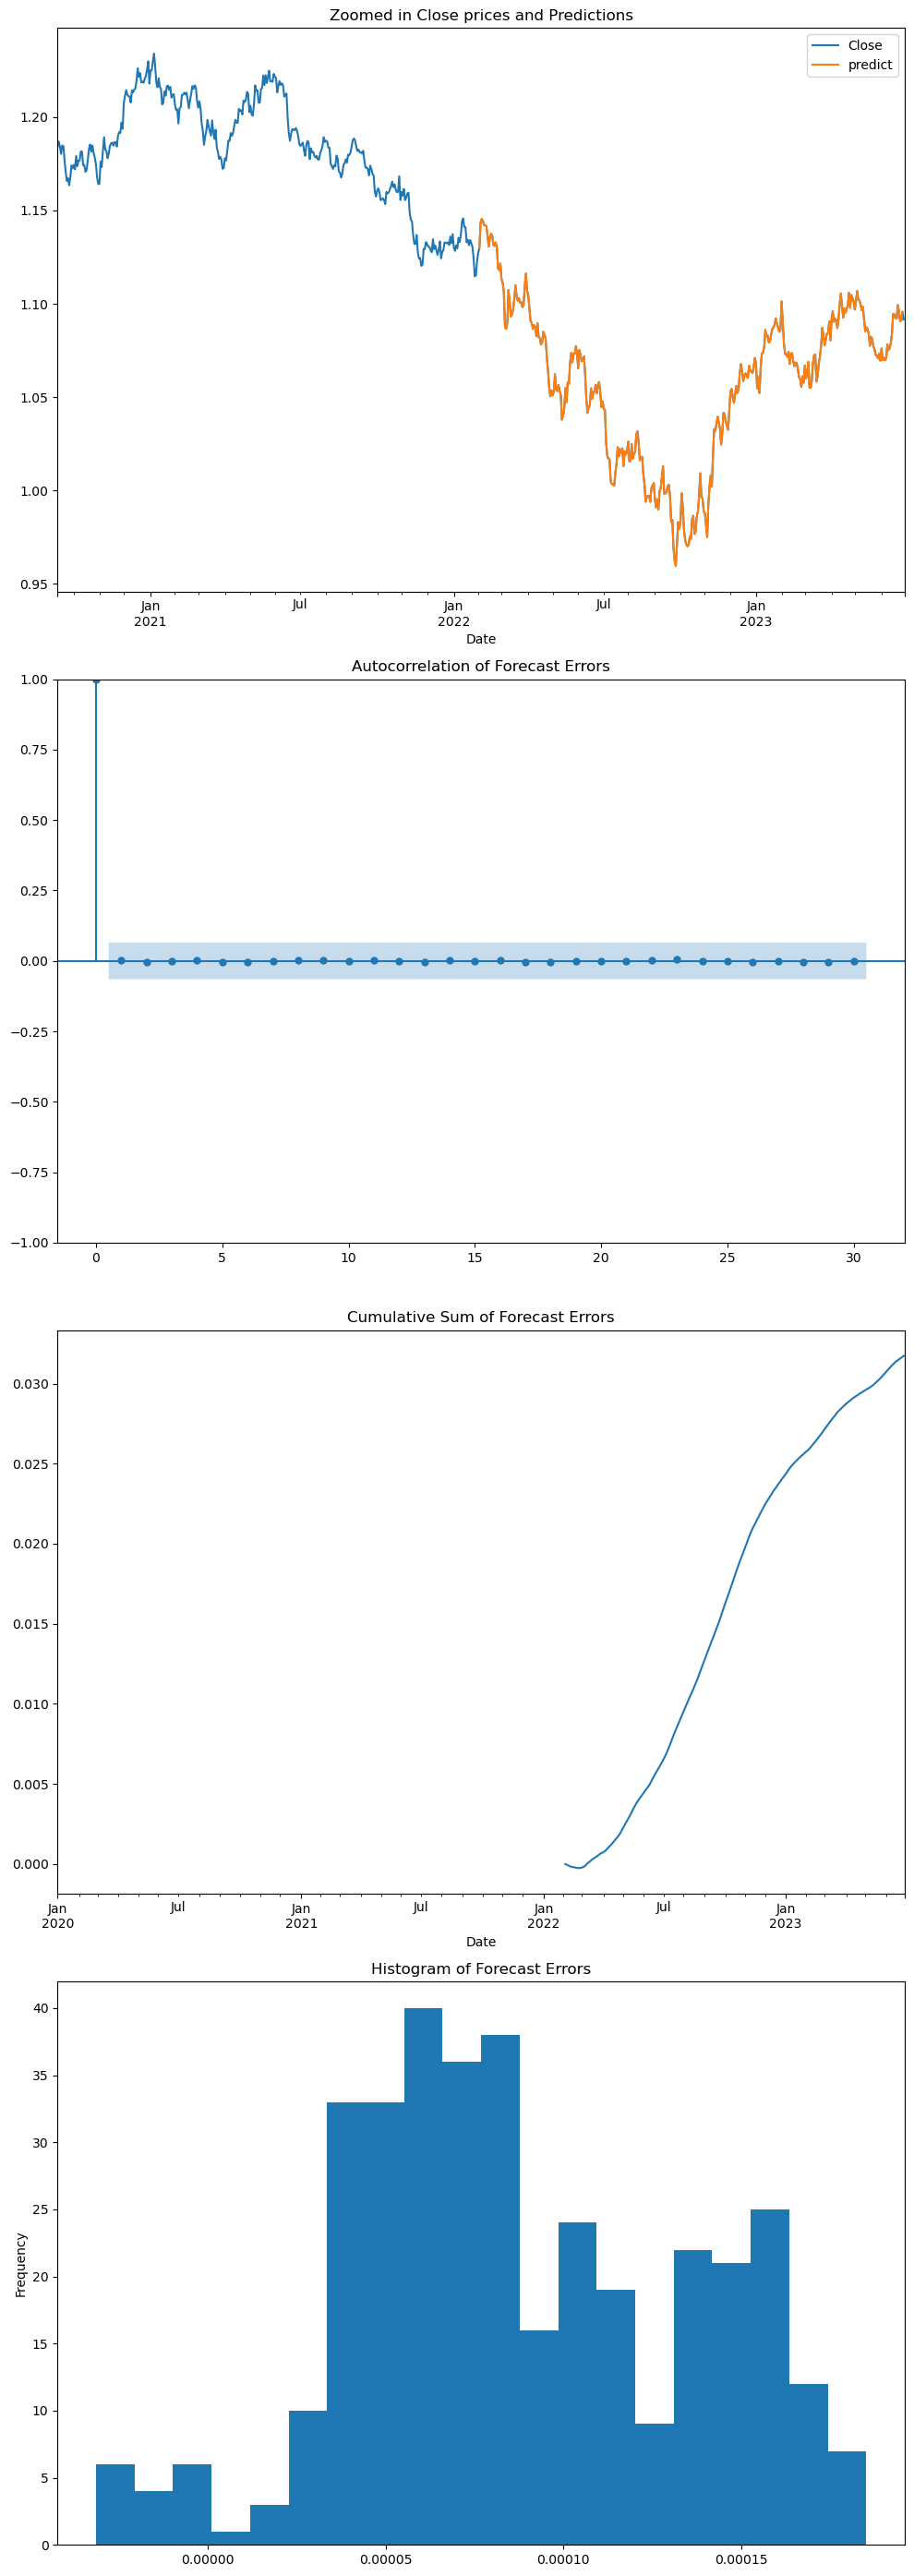

In [ ]:
import warnings
import yfinance as yf
import pandas as pd
import itertools
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings('ignore')

# Fetch daily data for EUR/USD
data = yf.download('EURUSD=X', start='2020-01-01', end='2023-06-30')

# We will use 'Close' prices for our analysis
df = pd.DataFrame(data['Close'].dropna())

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q, and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Best model parameters initialization
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None

# Search for the best model parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = SARIMAX(df['Close'],
                                 order=param,
                                 seasonal_order=param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            # Compare the AIC values
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal

        except:
            continue

print(f'Best SARIMAX model: SARIMAX({best_pdq}x{best_seasonal_pdq}) with AIC={best_aic}')

# Run a rolling forecast for a longer period
n_steps = 365

# Create a new DataFrame to hold predictions
df_predict = pd.DataFrame(index=df.index)

for i in range(len(df)-n_steps, len(df)):
    train_data = df['Close'][:i]
    model = SARIMAX(train_data,
                    order=best_pdq,
                    seasonal_order=best_seasonal_pdq,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    forecast = model_fit.get_forecast(steps=1)
    df_predict.loc[train_data.index[-1], 'predict'] = forecast.predicted_mean[0]

# Combine the original DataFrame with the forecast series
df_combined = pd.concat([df, df_predict], axis=1)

# Compute and plot ACF of residuals
residuals = model_fit.resid
ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)

# Calculate the error between the forecasted values and the actual close prices
df_combined['error'] = df_combined['Close'] - df_combined['predict']

# Calculate and print the mean absolute percentage error (MAPE)
mape = np.mean(np.abs(df_combined['error'] / df_combined['Close'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Calculate the cumulative sum of the forecast errors
cumulative_errors = df_combined['error'].cumsum()

# Calculate the autocorrelation of the forecast errors
error_autocorrelation = residuals.autocorr()

# Create a subplot figure
fig, ax = plt.subplots(4, 1, figsize=(10, 28))

# Plot a zoomed in version
df_combined[['Close', 'predict']].shift(-1).loc[df_combined.index[-n_steps*2:]].plot(ax=ax[0])  # Shift the close prices one day forward
ax[0].set_title('Zoomed in Close prices and Predictions')

# Plot the autocorrelation of the forecast errors
plot_acf(residuals, lags=30, ax=ax[1])
ax[1].set_title('Autocorrelation of Forecast Errors')

# Plot the cumulative sum of forecast errors
cumulative_errors.plot(ax=ax[2])
ax[2].set_title('Cumulative Sum of Forecast Errors')

# Plot the histogram of forecast errors
df_combined['error'].plot.hist(ax=ax[3], bins=20)
ax[3].set_title('Histogram of Forecast Errors')

plt.tight_layout()
plt.show()

**Solution**: The look ahead bias is present in the Main Indexing loop, specifically where the result is being stored. The line of code which is responsible for this error is: `df_predict.loc[train_data.index[-1], 'predict'] = forecast.predicted_mean[0]`

Here the predicted value for the next point in time is getting stored at the current point in time by mistake. Really, this predicted value should be stored at the next point in time (in this case the next day, which is represented by the next row). The predicted column is concat onto the DataFrame `'df_combined'`, keeping with this code arrangement, to move all the predicted values in the `'predict'` column of the `df_combined` dataframe down by a value, add the following code line: `df_combined['predict'] = df_combined['predict'].shift(1)` add it just under this line of code: `df_combined = pd.concat([df, df_predict], axis=1)` (add into line 75 of your GitHub script). Run the code again. And new results will appear. The errors in the df_combined dataframe will now be larger (overall still quite small as this is an FX pair where price movements are not significant, pip movement may be large though). 

**Updated code**:

[*********************100%***********************]  1 of 1 completed
Best SARIMAX model: SARIMAX((1, 0, 0)x(0, 0, 0, 12)) with AIC=-6928.077004310366
Mean Absolute Percentage Error (MAPE): 0.46%


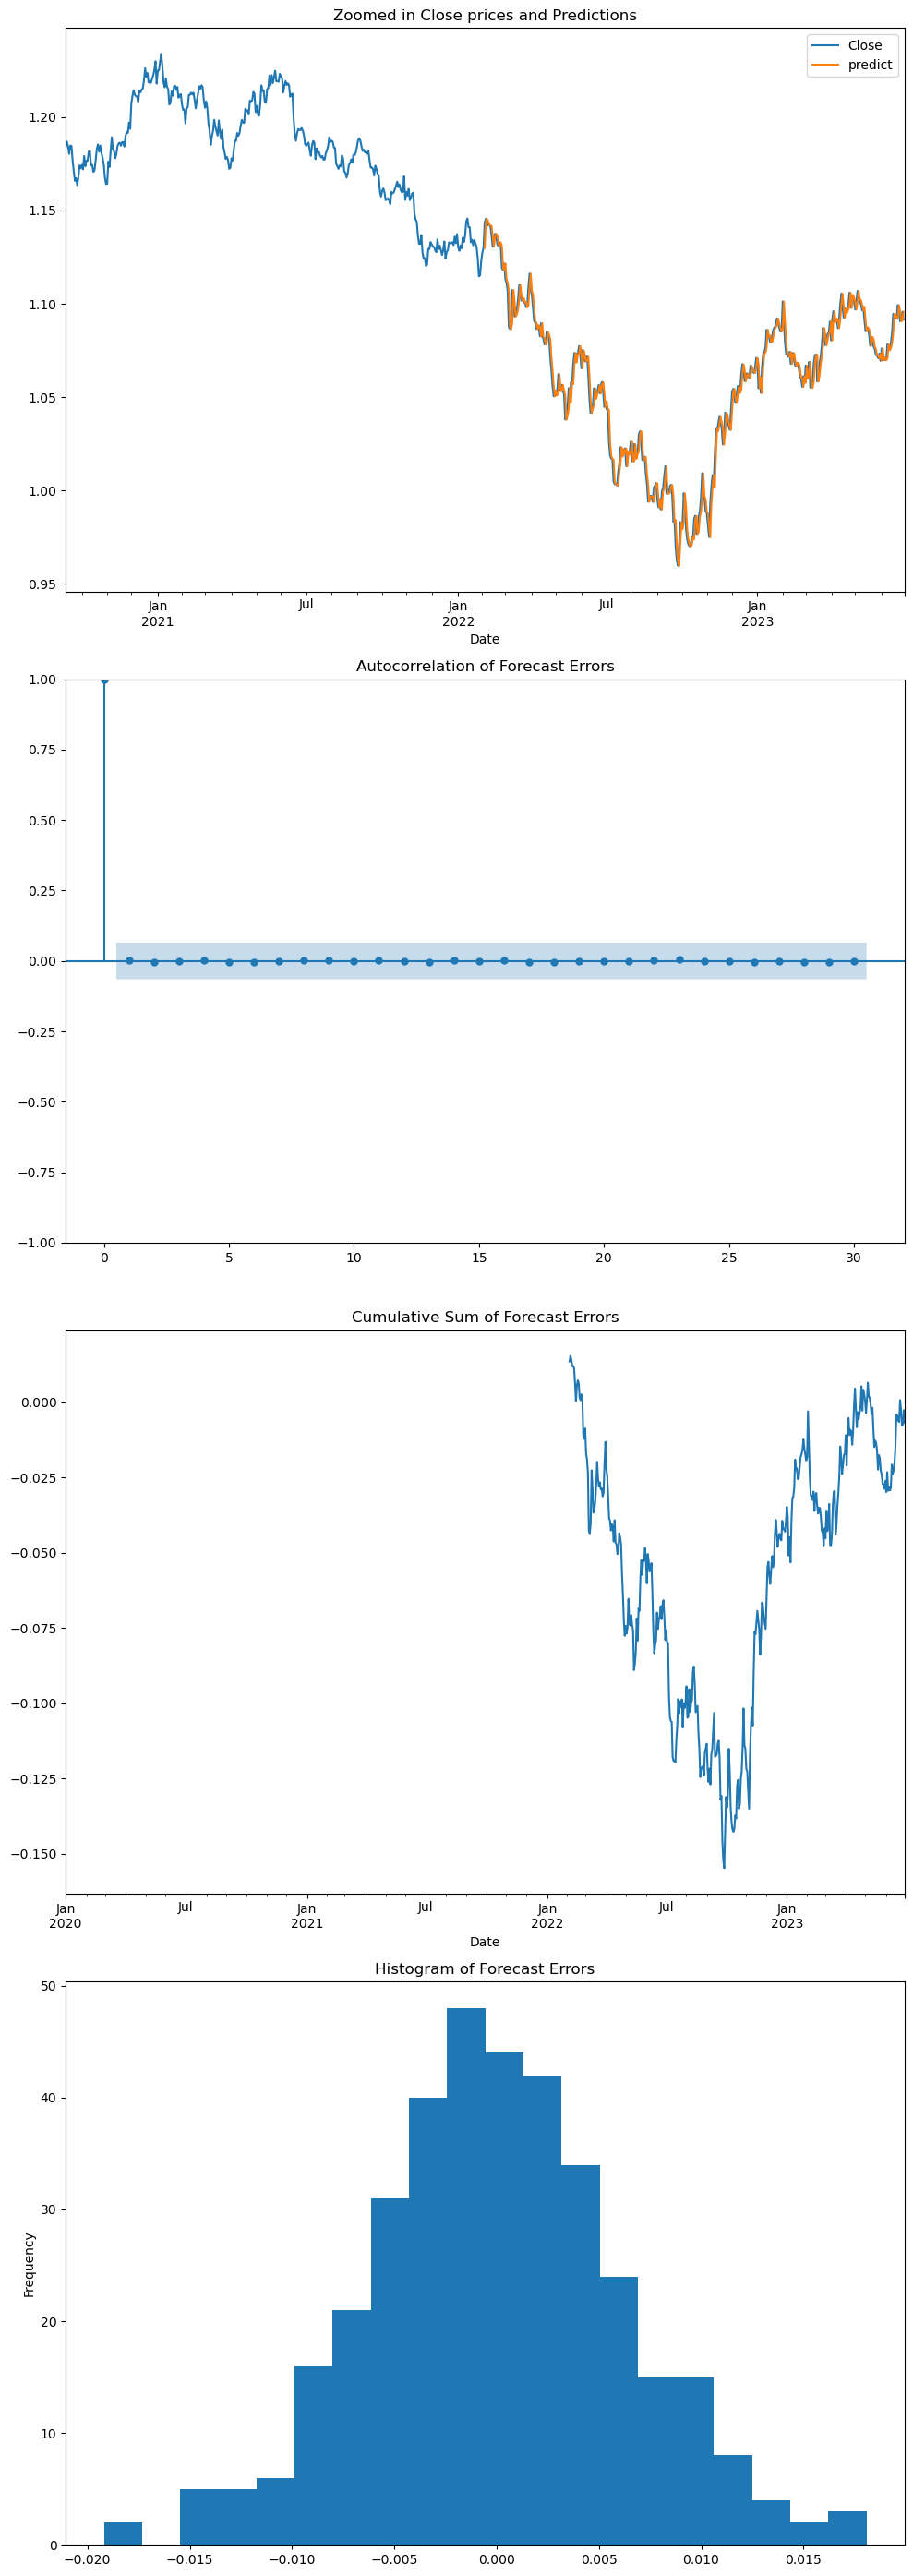

In [ ]:
import warnings
import yfinance as yf
import pandas as pd
import itertools
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings('ignore')

# Fetch daily data for EUR/USD
data = yf.download('EURUSD=X', start='2020-01-01', end='2023-06-30')

# We will use 'Close' prices for our analysis
df = pd.DataFrame(data['Close'].dropna())

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q, and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Best model parameters initialization
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None

# Search for the best model parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = SARIMAX(df['Close'],
                                 order=param,
                                 seasonal_order=param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            # Compare the AIC values
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal

        except:
            continue

print(f'Best SARIMAX model: SARIMAX({best_pdq}x{best_seasonal_pdq}) with AIC={best_aic}')

# Run a rolling forecast for a longer period
n_steps = 365

# Create a new DataFrame to hold predictions
df_predict = pd.DataFrame(index=df.index)

for i in range(len(df)-n_steps, len(df)):
    train_data = df['Close'][:i]
    model = SARIMAX(train_data,
                    order=best_pdq,
                    seasonal_order=best_seasonal_pdq,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    forecast = model_fit.get_forecast(steps=1)
    df_predict.loc[train_data.index[-1], 'predict'] = forecast.predicted_mean[0]

# Combine the original DataFrame with the forecast series
df_combined = pd.concat([df, df_predict], axis=1)

df_combined['predict'] = df_combined['predict'].shift(1) 

# Compute and plot ACF of residuals
residuals = model_fit.resid
ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)

# Calculate the error between the forecasted values and the actual close prices
df_combined['error'] = df_combined['Close'] - df_combined['predict']

# Calculate and print the mean absolute percentage error (MAPE)
mape = np.mean(np.abs(df_combined['error'] / df_combined['Close'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Calculate the cumulative sum of the forecast errors
cumulative_errors = df_combined['error'].cumsum()

# Calculate the autocorrelation of the forecast errors
error_autocorrelation = residuals.autocorr()

# Create a subplot figure
fig, ax = plt.subplots(4, 1, figsize=(10, 28))

# Plot a zoomed in version
df_combined[['Close', 'predict']].shift(-1).loc[df_combined.index[-n_steps*2:]].plot(ax=ax[0])  # Shift the close prices one day forward
ax[0].set_title('Zoomed in Close prices and Predictions')

# Plot the autocorrelation of the forecast errors
plot_acf(residuals, lags=30, ax=ax[1])
ax[1].set_title('Autocorrelation of Forecast Errors')

# Plot the cumulative sum of forecast errors
cumulative_errors.plot(ax=ax[2])
ax[2].set_title('Cumulative Sum of Forecast Errors')

# Plot the histogram of forecast errors
df_combined['error'].plot.hist(ax=ax[3], bins=20)
ax[3].set_title('Histogram of Forecast Errors')

plt.tight_layout()
plt.show()

# Example script 2 of Look Ahead Bias

**NOTE**: This code is sourced from outside the MEIF Quant.

[*********************100%***********************]  1 of 1 completed


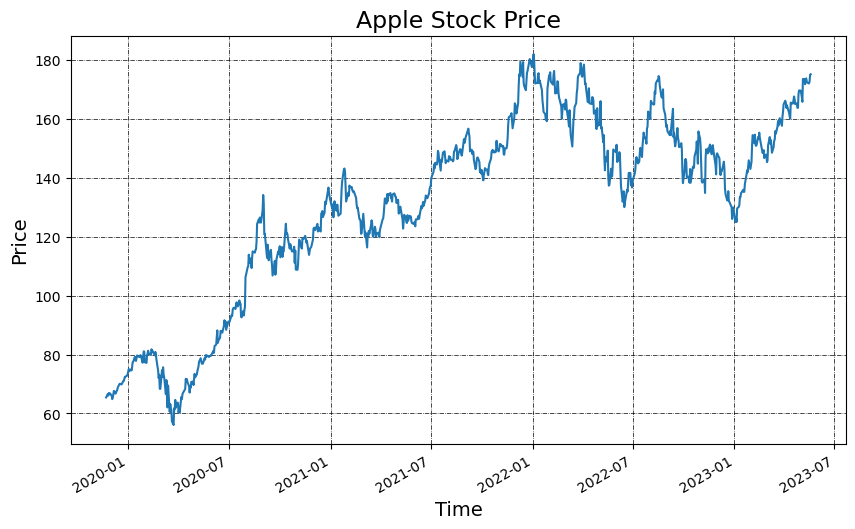

The historical stock market data's length is:  878
The training dataset's length is:  772
The validation set's length is:  87
The test set's length:  17

The shape of samples on x axis (time):
(772, 5) (87, 5) (19, 5)

The shape of samples on y axis (stock price):
(772,) (87,) (19,)
Linear Regression Model's Coefficients: 
 [-3.07331605e-02  1.12087116e-01 -5.48585543e-02  9.74415986e-01
 -2.48910708e-09]
Linear Regression Model's Intercept: 
 -1.5239196439246854
The Performance of our model (R^2):  0.9998730032031801
Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.24
Training Mean Squared Error: 0.13
Training RMSE:  0.36
Training MAE:  0.29
 
Validation R-squared:  0.99
Validation Explained Variation:  1.0
Validation MAPE: 0.67
Validation Mean Squared Error: 0.13
Validation RMSE:  1.01
Validation MAE:  1.0
 
Test R-squared:  0.89
Test Explained Variation:  1.0
Test MAPE: 0.67
Test Mean Squared Error: 1.33
Test RMSE:  1.15
Test MAE:  1.15


<Axes: >

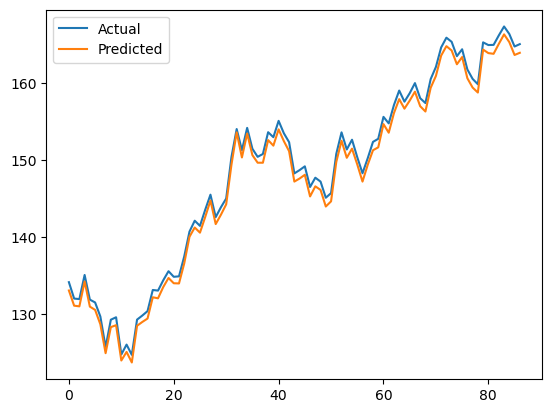

In [ ]:
# We import this library to clear the cell output after it's being executed
# Because imstallation will generate lots of logs, clear them will make the
# ...notebook more visible
from IPython.display import clear_output

clear_output(wait=False)

# Import essential Libraries
# You don't really need to know what these libraries do

import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os
import pandas_datareader.data as web
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

# Specify the Start and End time
start = '2019-11-22'
end = '2023-05-20'

# Specify Company name: Apple (AAPL)
stock_market_data = yf.download("AAPL", start, end)


# Take a look at the first 5 rows
stock_market_data.head(5)
# Take a look at the last 5 rows
stock_market_data.tail(5)

# Utitlize Matplotlib to draw the line chart of our stock market data

# use the following command to select "Close" column from the entire dataframe:
stock_market_data['Close'].plot(figsize=(10, 6))

# To make the graph clearer we would also want to specify title and the labels of its x and y axes
plt.title("Apple Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)

# Then we will draw the dotted lines to make the graph preetier
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Finally we plot the graph to make it visible
plt.show()

def create_train_test_set(dataframe_stock_market_data):

  features = dataframe_stock_market_data.drop(columns=['Adj Close'], axis=1)
  target = dataframe_stock_market_data['Adj Close']

  data_length = dataframe_stock_market_data.shape[0]

  print("The historical stock market data's length is: ", str(data_length))

  # Then we want to separate the data into three parts: training set, validation set and testing set.
  # We use the conventional train-split ratio: 88% for training, 10% for validation and 2% for testing
  # There's no golden standard for train-test splitting, you can use whatever ratio you want but the performance may not be optimal
  train_split = int(data_length * 0.88)
  print("The training dataset's length is: ", str(train_split))

  val_split = train_split + int(data_length * 0.1)
  print("The validation set's length is: ", str(int(data_length * 0.1)))

  print("The test set's length: ", str(int(data_length * 0.02)))

  # Splitting features and target into train, validation and test samples 
  X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
  Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

  #print shape of samples
  print("\nThe shape of samples on x axis (time):")
  print(X_train.shape, X_val.shape, X_test.shape)
  
  print("\nThe shape of samples on y axis (stock price):")
  print(Y_train.shape, Y_val.shape, Y_test.shape)
    
  return X_train, X_val, X_test, Y_train, Y_val, Y_test


# Generate datasets
X_train, X_validate, X_test, Y_train, Y_validate, Y_test = create_train_test_set(stock_market_data)



from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
linear_regression_model = LinearRegression()

# train the model using training set
linear_regression_model.fit(X_train, Y_train)

print("Linear Regression Model's Coefficients: \n", linear_regression_model.coef_)
print("Linear Regression Model's Intercept: \n", linear_regression_model.intercept_)

print("The Performance of our model (R^2): ", linear_regression_model.score(X_train, Y_train))

def get_mape(y_truth, y_predicted): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_truth, y_predicted = np.array(y_truth), np.array(y_predicted)
    return np.mean(np.abs((y_truth - y_predicted) / y_truth)) * 100


# Get predicted data for training set, validation set and test set.
Y_train_predicted = linear_regression_model.predict(X_train)
Y_validate_predicted = linear_regression_model.predict(X_validate)
Y_test_predicted = linear_regression_model.predict(X_test)

# print out prediction result of these three datasets respectively
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_predicted),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_predicted),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_predicted), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_predicted), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_predicted)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_predicted),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_validate,Y_validate_predicted),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_validate,Y_validate_predicted),2))
print('Validation MAPE:', round(get_mape(Y_validate,Y_validate_predicted), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_predicted), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_validate,Y_validate_predicted)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_validate,Y_validate_predicted),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_predicted),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_predicted),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_predicted), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_predicted), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_predicted)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_predicted),2))

dataframe_predicted = pd.DataFrame(Y_validate.values, columns=['Actual'], index = Y_validate.index)
dataframe_predicted['Predicted'] = Y_validate_predicted

dataframe_predicted = dataframe_predicted.reset_index()
dataframe_predicted.loc[:, 'Date'] = pd.to_datetime(dataframe_predicted['Date'], format='%Y-%m-%d')
dataframe_predicted.head(5)

dataframe_predicted[['Actual', 'Predicted']].plot()

Viewing the bottom figure, the price is not directly on the Actual price, which does not cause suspicion. The key thing to notice is the price reversals occuring, before they occur. Predicting price reversals on a scale like this, is very hard for most models to predict correctly, even Neural Networks struggle with this task. Therefore due to the price reversal prediction being spot on, the model is likely to have look ahead bias accidentally programmed in.

**Solution**: The original code was using the current point in time data to predict for the future point in time.

2 solutions
1. In the data preprocessing
2. In the data post processing.


#### 1st Solution
Shift the target column values up by a single row, so our model is now predicting for the next point in time, based on the information up to the current point in time. And the model is being trained in the same manner, as it should be; predicting for the next point in time using the information available to us at this current point in time. 

In the function `create_train_test_set` we are going to shift the target column via the following code: `target=target.shift(-1)`, this must be implemented under the line: `target = dataframe_stock_market_data['Adj Close']`
Then, as we have shifted the target column up by a value, we must removed the last index/row as it will now contain 'nan' which will result in an error when plotting results. Additionally, if we remove the final row/index of the target column, we must do the same for the features column otherwise we will encounter another issue due to indexing. 
This is coded in by adding just under our newly added line `(target=target.shift(-1))`: 
- `target = target.drop(target.index[-1])`
- `features = features.drop(features.index[-1])`

#### 2nd Solution
This is a post-processing solution, please do not implement both the first and second solution together, otherwise your code will now be purposefully delayed in calculating signals. 

Here we will simply shift the true values left by a single index (back in time), very simple solution.

Take the following line:
```dataframe_predicted = pd.DataFrame(Y_validate.values, columns=['Actual'], index = Y_validate.index)```

And then add `shift(-1)`, to shift all the values up by a single row. 
```dataframe_predicted = pd.DataFrame(Y_validate.shift(-1).values, columns=['Actual'], index = Y_validate.index)```

Both solutions work with the same respect. 

> Note: There is always multiple ways to solve a single problem. Here I have highlighted 2 of them, one in the pre-processing stage and the other in the post-processing stage.


#### 1st Solution Code
I will produce updated code below with the **1st** solution.

[*********************100%***********************]  1 of 1 completed


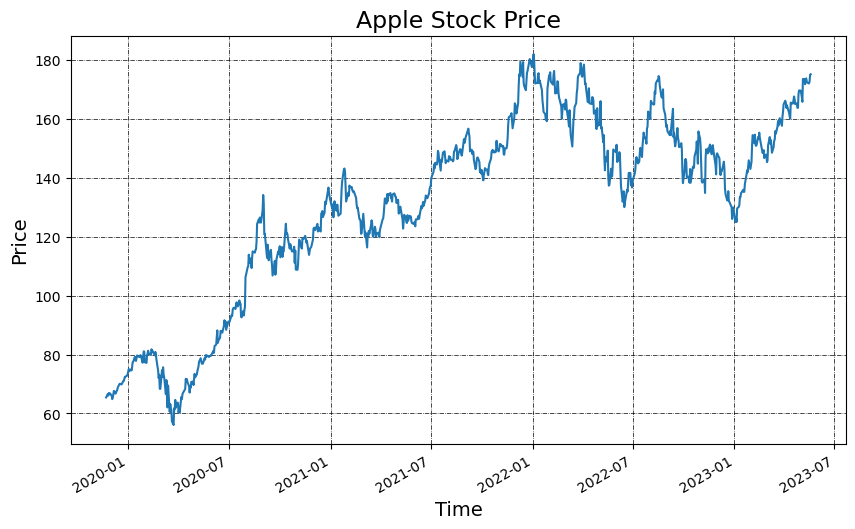

The historical stock market data's length is:  878
The training dataset's length is:  772
The validation set's length is:  87
The test set's length:  17

The shape of samples on x axis (time):
(772, 5) (87, 5) (19, 5)

The shape of samples on y axis (stock price):
(772,) (87,) (19,)
Linear Regression Model's Coefficients: 
 [-3.07329993e-02  1.12087042e-01 -5.48589922e-02  9.74416323e-01
 -2.48910730e-09]
Linear Regression Model's Intercept: 
 -1.5239183366218612
The Performance of our model (R^2):  0.9998730035073182
Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.24
Training Mean Squared Error: 0.13
Training RMSE:  0.36
Training MAE:  0.29
 
Validation R-squared:  0.99
Validation Explained Variation:  1.0
Validation MAPE: 0.67
Validation Mean Squared Error: 0.13
Validation RMSE:  1.01
Validation MAE:  1.0
 
Test R-squared:  0.89
Test Explained Variation:  1.0
Test MAPE: 0.67
Test Mean Squared Error: 1.33
Test RMSE:  1.15
Test MAE:  1.15


<Axes: >

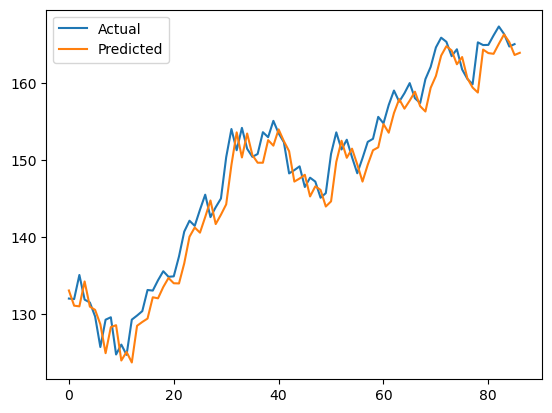

In [ ]:
# We import this library to clear the cell output after it's being executed
# Because imstallation will generate lots of logs, clear them will make the
# ...notebook more visible
from IPython.display import clear_output

clear_output(wait=False)

# Import essential Libraries
# You don't really need to know what these libraries do

import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os
import pandas_datareader.data as web
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

# Specify the Start and End time
start = '2019-11-22'
end = '2023-05-20'

# Specify Company name: Apple (AAPL)
stock_market_data = yf.download("AAPL", start, end)


# Take a look at the first 5 rows
stock_market_data.head(5)
# Take a look at the last 5 rows
stock_market_data.tail(5)

# Utitlize Matplotlib to draw the line chart of our stock market data

# use the following command to select "Close" column from the entire dataframe:
stock_market_data['Close'].plot(figsize=(10, 6))

# To make the graph clearer we would also want to specify title and the labels of its x and y axes
plt.title("Apple Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)

# Then we will draw the dotted lines to make the graph preetier
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Finally we plot the graph to make it visible
plt.show()

def create_train_test_set(dataframe_stock_market_data):

    features = dataframe_stock_market_data.drop(columns=['Adj Close'], axis=1)
    target = dataframe_stock_market_data['Adj Close']
    target = target.shift(-1)

    target = target.drop(target.index[-1])
    features = features.drop(features.index[-1])


    data_length = dataframe_stock_market_data.shape[0]

    print("The historical stock market data's length is: ", str(data_length))

    # Then we want to separate the data into three parts: training set, validation set and testing set.
    # We use the conventional train-split ratio: 88% for training, 10% for validation and 2% for testing
    # There's no golden standard for train-test splitting, you can use whatever ratio you want but the performance may not be optimal
    train_split = int(data_length * 0.88)
    print("The training dataset's length is: ", str(train_split))

    val_split = train_split + int(data_length * 0.1)
    print("The validation set's length is: ", str(int(data_length * 0.1)))

    print("The test set's length: ", str(int(data_length * 0.02)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print("\nThe shape of samples on x axis (time):")
    print(X_train.shape, X_val.shape, X_test.shape)

    print("\nThe shape of samples on y axis (stock price):")
    print(Y_train.shape, Y_val.shape, Y_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test


# Generate datasets
X_train, X_validate, X_test, Y_train, Y_validate, Y_test = create_train_test_set(stock_market_data)



from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
linear_regression_model = LinearRegression()

# train the model using training set
linear_regression_model.fit(X_train, Y_train)

print("Linear Regression Model's Coefficients: \n", linear_regression_model.coef_)
print("Linear Regression Model's Intercept: \n", linear_regression_model.intercept_)

print("The Performance of our model (R^2): ", linear_regression_model.score(X_train, Y_train))

def get_mape(y_truth, y_predicted): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_truth, y_predicted = np.array(y_truth), np.array(y_predicted)
    return np.mean(np.abs((y_truth - y_predicted) / y_truth)) * 100


# Get predicted data for training set, validation set and test set.
Y_train_predicted = linear_regression_model.predict(X_train)
Y_validate_predicted = linear_regression_model.predict(X_validate)
Y_test_predicted = linear_regression_model.predict(X_test)

# print out prediction result of these three datasets respectively
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_predicted),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_predicted),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_predicted), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_predicted), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_predicted)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_predicted),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_validate,Y_validate_predicted),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_validate,Y_validate_predicted),2))
print('Validation MAPE:', round(get_mape(Y_validate,Y_validate_predicted), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_predicted), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_validate,Y_validate_predicted)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_validate,Y_validate_predicted),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_predicted),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_predicted),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_predicted), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_predicted), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_predicted)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_predicted),2))

dataframe_predicted = pd.DataFrame(Y_validate.shift(-1).values, columns=['Actual'], index = Y_validate.index)
dataframe_predicted['Predicted'] = Y_validate_predicted

dataframe_predicted = dataframe_predicted.reset_index()
dataframe_predicted.loc[:, 'Date'] = pd.to_datetime(dataframe_predicted['Date'], format='%Y-%m-%d')
dataframe_predicted.head(5)

dataframe_predicted[['Actual', 'Predicted']].plot()

**Questions**
Any questions please message the Quant group chat.

Any issues in the code please message Joe. (Spelling mistakes, bad worded with a proposal for better wording, incorrect description of terms).

# Appendicies